## 1.0 Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, xticks
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV,cross_validate,KFold
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,precision_score, recall_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn import preprocessing, utils

import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgbm
from lightgbm import LGBMRegressor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from IPython.display import Image
from six import StringIO
from io import StringIO
import pydotplus
import graphviz


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 2.0 Importing Dataframe and evaluating basic properties

In [2]:
base=pd.read_csv('CTGAN Generated data.csv')
base=base.rename(columns=lambda x: x.strip())

In [3]:
base.head()

,Feed N Plus 2A content,Reactor WAIT,H2 to HC,Reactor 1 Inlet Temp,Reactor 2 Inlet Temp,Reactor 3 Inlet Temp,Reactor 4 Inlet Temp,Reactor 1 Delta T,Reactor 2 Delta T,Reactor 3 Delta T,Reactor 4 Delta T,Reactor 1 Delta P,Reactor 2 Delta P,Reactor 3 Delta P,Reactor 4 Delta P,Seperator Pressure,Seperator Temperature,Recycle gas purity,Net gas Hydrogen Purity,Coke on Spent Catalyst,Chloride Injection rate,Total Paraffins in feed,Total Naphthenes in feed,Total Aromatics in feed,Total olefins in Feed,Reactor LHSV,Feed IBP,50% IBP,WABT,Plant C5PlusYield
0,45.46,1004.48,3.28,998.41,1000.46,1006.41,1011.81,166.26,108.39,72.02,39.17,1.17,2.73,2.77,3.17,30.83,100.62,78.67,88.24,3.82,2.59,64.91,24.60,10.43,0.06,1.62,194.19,250.57,959.41,83.24
1,44.22,1004.54,3.17,999.00,999.57,1003.23,1012.77,166.37,105.33,68.00,38.45,1.17,2.80,2.78,3.22,30.32,103.02,78.67,88.24,3.56,2.64,65.89,23.58,10.32,0.21,1.62,192.95,247.78,960.68,83.20
2,44.22,1004.54,3.17,996.97,999.72,1004.46,1012.81,165.14,107.33,69.92,39.13,1.16,2.74,2.77,3.25,30.27,103.55,78.67,88.24,3.56,2.58,65.89,23.58,10.32,0.21,1.62,192.95,247.78,960.68,83.20
3,45.49,1002.61,3.46,998.34,997.32,1001.66,1011.66,172.18,106.72,70.46,40.10,1.25,2.72,2.76,3.18,32.56,103.20,77.88,88.40,3.82,2.60,63.35,27.07,9.21,0.35,1.62,194.06,249.98,957.49,83.46
4,45.46,1004.34,3.31,998.17,999.71,1004.88,1013.84,165.81,107.55,69.72,39.09,1.16,2.77,2.76,3.09,30.39,103.05,78.67,88.24,3.82,2.60,64.91,24.60,10.43,0.06,1.62,194.19,250.57,959.56,83.33


In [4]:
base.shape

(5962, 30)

## 3.0 Data Cleansing

In [5]:
base.describe()

,Feed N Plus 2A content,Reactor WAIT,H2 to HC,Reactor 1 Inlet Temp,Reactor 2 Inlet Temp,Reactor 3 Inlet Temp,Reactor 4 Inlet Temp,Reactor 1 Delta T,Reactor 2 Delta T,Reactor 3 Delta T,Reactor 4 Delta T,Reactor 1 Delta P,Reactor 2 Delta P,Reactor 3 Delta P,Reactor 4 Delta P,Seperator Pressure,Seperator Temperature,Recycle gas purity,Net gas Hydrogen Purity,Coke on Spent Catalyst,Chloride Injection rate,Total Paraffins in feed,Total Naphthenes in feed,Total Aromatics in feed,Total olefins in Feed,Reactor LHSV,Feed IBP,50% IBP,WABT,Plant C5PlusYield
count,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000
mean,47.972068,982.563648,3.814648,975.295392,982.172801,983.606872,986.789906,161.030943,106.133452,71.095792,41.762420,0.992466,2.587736,2.640976,2.805659,33.360704,105.697828,81.232031,89.338293,3.165453,2.385143,62.431676,26.454210,10.758345,0.206850,1.566602,198.658737,252.245359,937.485580,84.994794
std,2.046191,14.284562,0.335320,13.532721,15.434145,13.933120,15.674754,7.303361,6.186524,3.766175,4.140208,0.341575,0.091843,0.132266,0.240884,1.310147,3.924914,9.579163,1.220673,0.819124,0.296423,2.201652,2.749912,1.069349,0.213717,0.080772,6.455776,2.724750,15.588433,1.209658
min,40.380000,963.040000,3.100000,945.740000,951.400000,960.060000,964.350000,134.380000,86.240000,52.290000,22.690000,0.450000,2.330000,2.150000,2.130000,28.650000,92.960000,0.860000,86.110000,1.820000,0.840000,48.920000,18.940000,7.190000,0.050000,1.170000,186.230000,215.230000,915.360000,79.480000
25%,47.000000,968.530000,3.560000,964.770000,966.470000,970.472500,971.550000,156.232500,101.560000,69.530000,39.670000,0.650000,2.520000,2.530000,2.640000,32.510000,103.290000,80.880000,88.250000,2.500000,2.102500,60.830000,24.140000,9.960000,0.100000,1.500000,193.970000,252.270000,921.480000,84.130000
50%,48.150000,980.890000,3.770000,970.845000,981.850000,981.610000,986.385000,161.160000,106.120000,71.350000,42.580000,1.100000,2.570000,2.650000,2.840000,33.490000,105.805000,82.550000,89.590000,3.150000,2.510000,62.370000,26.860000,10.770000,0.120000,1.570000,196.850000,252.560000,935.890000,85.260000
75%,49.380000,991.927500,4.030000,984.447500,994.270000,995.450000,996.162500,166.407500,110.450000,73.137500,44.670000,1.310000,2.670000,2.750000,2.980000,34.300000,108.307500,83.450000,90.440000,3.830000,2.580000,63.860000,28.490000,11.500000,0.200000,1.620000,200.090000,252.890000,947.220000,85.830000
max,59.890000,1009.490000,5.660000,1004.350000,1015.790000,1009.320000,1015.620000,176.950000,128.670000,83.260000,51.740000,1.880000,2.820000,2.920000,3.280000,36.500000,119.300000,86.820000,91.400000,4.650000,3.160000,69.950000,41.150000,13.390000,1.480000,1.740000,217.400000,258.500000,967.720000,88.790000


In [6]:
### Removing outliers using Q1-1.5IQR & Q3+1.5IQR
def mod_outlier(df):
    
        df1 = df.copy()
        df1 = df1._get_numeric_data()

        df2 = df.copy()

        q1 = df1.quantile(0.1)
        q3 = df1.quantile(0.9)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr) 

        for col in df.columns:
            for i in range(0,len(df1[col])):
                if df1[col][i] < lower_bound[col]:            
                    df1[col][i] = np.nan

                if df1[col][i] > upper_bound[col]:            
                    df1[col][i] = np.nan


            for col in df.columns:
                df2[col] = df1[col]

        return(df2)
    
    
df_outlier_removed = mod_outlier(base) #Passing the base dataframe through the mod_outlier function
print(df_outlier_removed.isna().sum())
df_outlier_removed=df_outlier_removed.dropna() ## Dropping blank rows

Feed N Plus 2A content       18
Reactor WAIT                  0
H2 to HC                     13
Reactor 1 Inlet Temp          0
Reactor 2 Inlet Temp          0
Reactor 3 Inlet Temp          0
Reactor 4 Inlet Temp          0
Reactor 1 Delta T             0
Reactor 2 Delta T             0
Reactor 3 Delta T             2
Reactor 4 Delta T             0
Reactor 1 Delta P             0
Reactor 2 Delta P             0
Reactor 3 Delta P             0
Reactor 4 Delta P             0
Seperator Pressure            0
Seperator Temperature         0
Recycle gas purity           80
Net gas Hydrogen Purity       0
Coke on Spent Catalyst        0
Chloride Injection rate       2
Total Paraffins in feed      21
Total Naphthenes in feed     18
Total Aromatics in feed       0
Total olefins in Feed       142
Reactor LHSV                 22
Feed IBP                      0
50% IBP                      69
WABT                          0
Plant C5PlusYield             0
dtype: int64


## 4.0 Identifying Features/Independent variables for building models

### 4.1 Feature Selection Based on RFE using DecisionTreeRegressor and LinearRegression

In [7]:
# RFE using DecisionTree Regressor

def rfe_DecissionTreeRegressor(df, target_col, k):
    # Create a copy of the original dataframe
    df_new = df.copy()

    # Get the target column values
    y = df_new[target_col]

    # Initialize a decision tree regressor model
    model = DecisionTreeRegressor()

    # Initialize RFE with the decision tree regressor model and the number of desired features (k)
    rfe = RFE(estimator=model, n_features_to_select=k)

    # Perform recursive feature elimination
    rfe.fit(df_new.drop(target_col, axis=1), y)

    # Get the selected feature indices
    selected_indices = rfe.get_support(indices=True)

    # Get the names of the selected features
    important_vars = df_new.drop(target_col, axis=1).columns[selected_indices].tolist()

    return important_vars

# Dataframe is named 'df_outlier_removed' and the target column is named 'Plant C5PlusYield'
k = 15  # Select the top 15 most important variables
important_vars_dectree = rfe_DecissionTreeRegressor(df_outlier_removed, 'Plant C5PlusYield', k)

# Print the list of important variables
print(important_vars_dectree)

['Feed N Plus 2A content', 'Reactor WAIT', 'H2 to HC', 'Reactor 1 Inlet Temp', 'Reactor 1 Delta T', 'Reactor 3 Delta T', 'Seperator Pressure', 'Seperator Temperature', 'Net gas Hydrogen Purity', 'Coke on Spent Catalyst', 'Chloride Injection rate', 'Total olefins in Feed', 'Reactor LHSV', '50% IBP', 'WABT']


In [8]:
# Recrussive Feature Engineering using Linear Regression

def rfe_LinearRegression(df, target_col, k):
    # Create a copy of the original dataframe
    df_new = df.copy()

    # Get the target column values
    y = df_new[target_col]

    # Initialize a linear regression model
    model = LinearRegression()

    # Initialize RFE with the linear regression model and the number of desired features (k)
    rfe = RFE(estimator=model, n_features_to_select=k)

    # Perform recursive feature elimination
    rfe.fit(df_new.drop(target_col, axis=1), y)

    # Get the selected feature indices
    selected_indices = rfe.get_support(indices=True)

    # Get the names of the selected features
    important_vars = df_new.drop(target_col, axis=1).columns[selected_indices].tolist()

    return important_vars

# Dataframe is named 'df_outlier_removed' and the target column is named 'Plant C5PlusYield'
k = 15  # Select the top 15 most important variables
important_vars_lr = rfe_LinearRegression(df_outlier_removed, 'Plant C5PlusYield', k)

# Print the list of important variables
print(important_vars_lr)

['Feed N Plus 2A content', 'Reactor WAIT', 'H2 to HC', 'Reactor 1 Delta P', 'Reactor 2 Delta P', 'Reactor 3 Delta P', 'Reactor 4 Delta P', 'Seperator Pressure', 'Coke on Spent Catalyst', 'Chloride Injection rate', 'Total Paraffins in feed', 'Total Naphthenes in feed', 'Total Aromatics in feed', 'Total olefins in Feed', 'Reactor LHSV']


In [9]:
max_length = max(len(important_vars_lr), len(important_vars_dectree))

common_vars = list(set(important_vars_lr) & set(important_vars_dectree))
common_vars += [None] * (max_length - len(common_vars))

lr_only_vars = list(set(important_vars_lr) - set(important_vars_dectree))
lr_only_vars += [None] * (max_length - len(lr_only_vars))

dectree_only_vars = list(set(important_vars_dectree) - set(important_vars_lr))
dectree_only_vars += [None] * (max_length - len(dectree_only_vars))

df_rfe = pd.DataFrame({'Common': common_vars, 'Linear Regression RFE': lr_only_vars, 'Decision Tree RFE': dectree_only_vars})

df_rfe

,Common,Linear Regression RFE,Decision Tree RFE
0,H2 to HC,Total Paraffins in feed,Reactor 1 Inlet Temp
1,Seperator Pressure,Total Aromatics in feed,50% IBP
2,Chloride Injection rate,Reactor 3 Delta P,Reactor 1 Delta T
3,Reactor LHSV,Reactor 4 Delta P,Reactor 3 Delta T
4,Feed N Plus 2A content,Reactor 2 Delta P,WABT
5,Total olefins in Feed,Reactor 1 Delta P,Seperator Temperature
6,Coke on Spent Catalyst,Total Naphthenes in feed,Net gas Hydrogen Purity
7,Reactor WAIT,None,None
8,None,None,None
9,None,None,None


### 4.2 Feature selection based on Subject knowledge

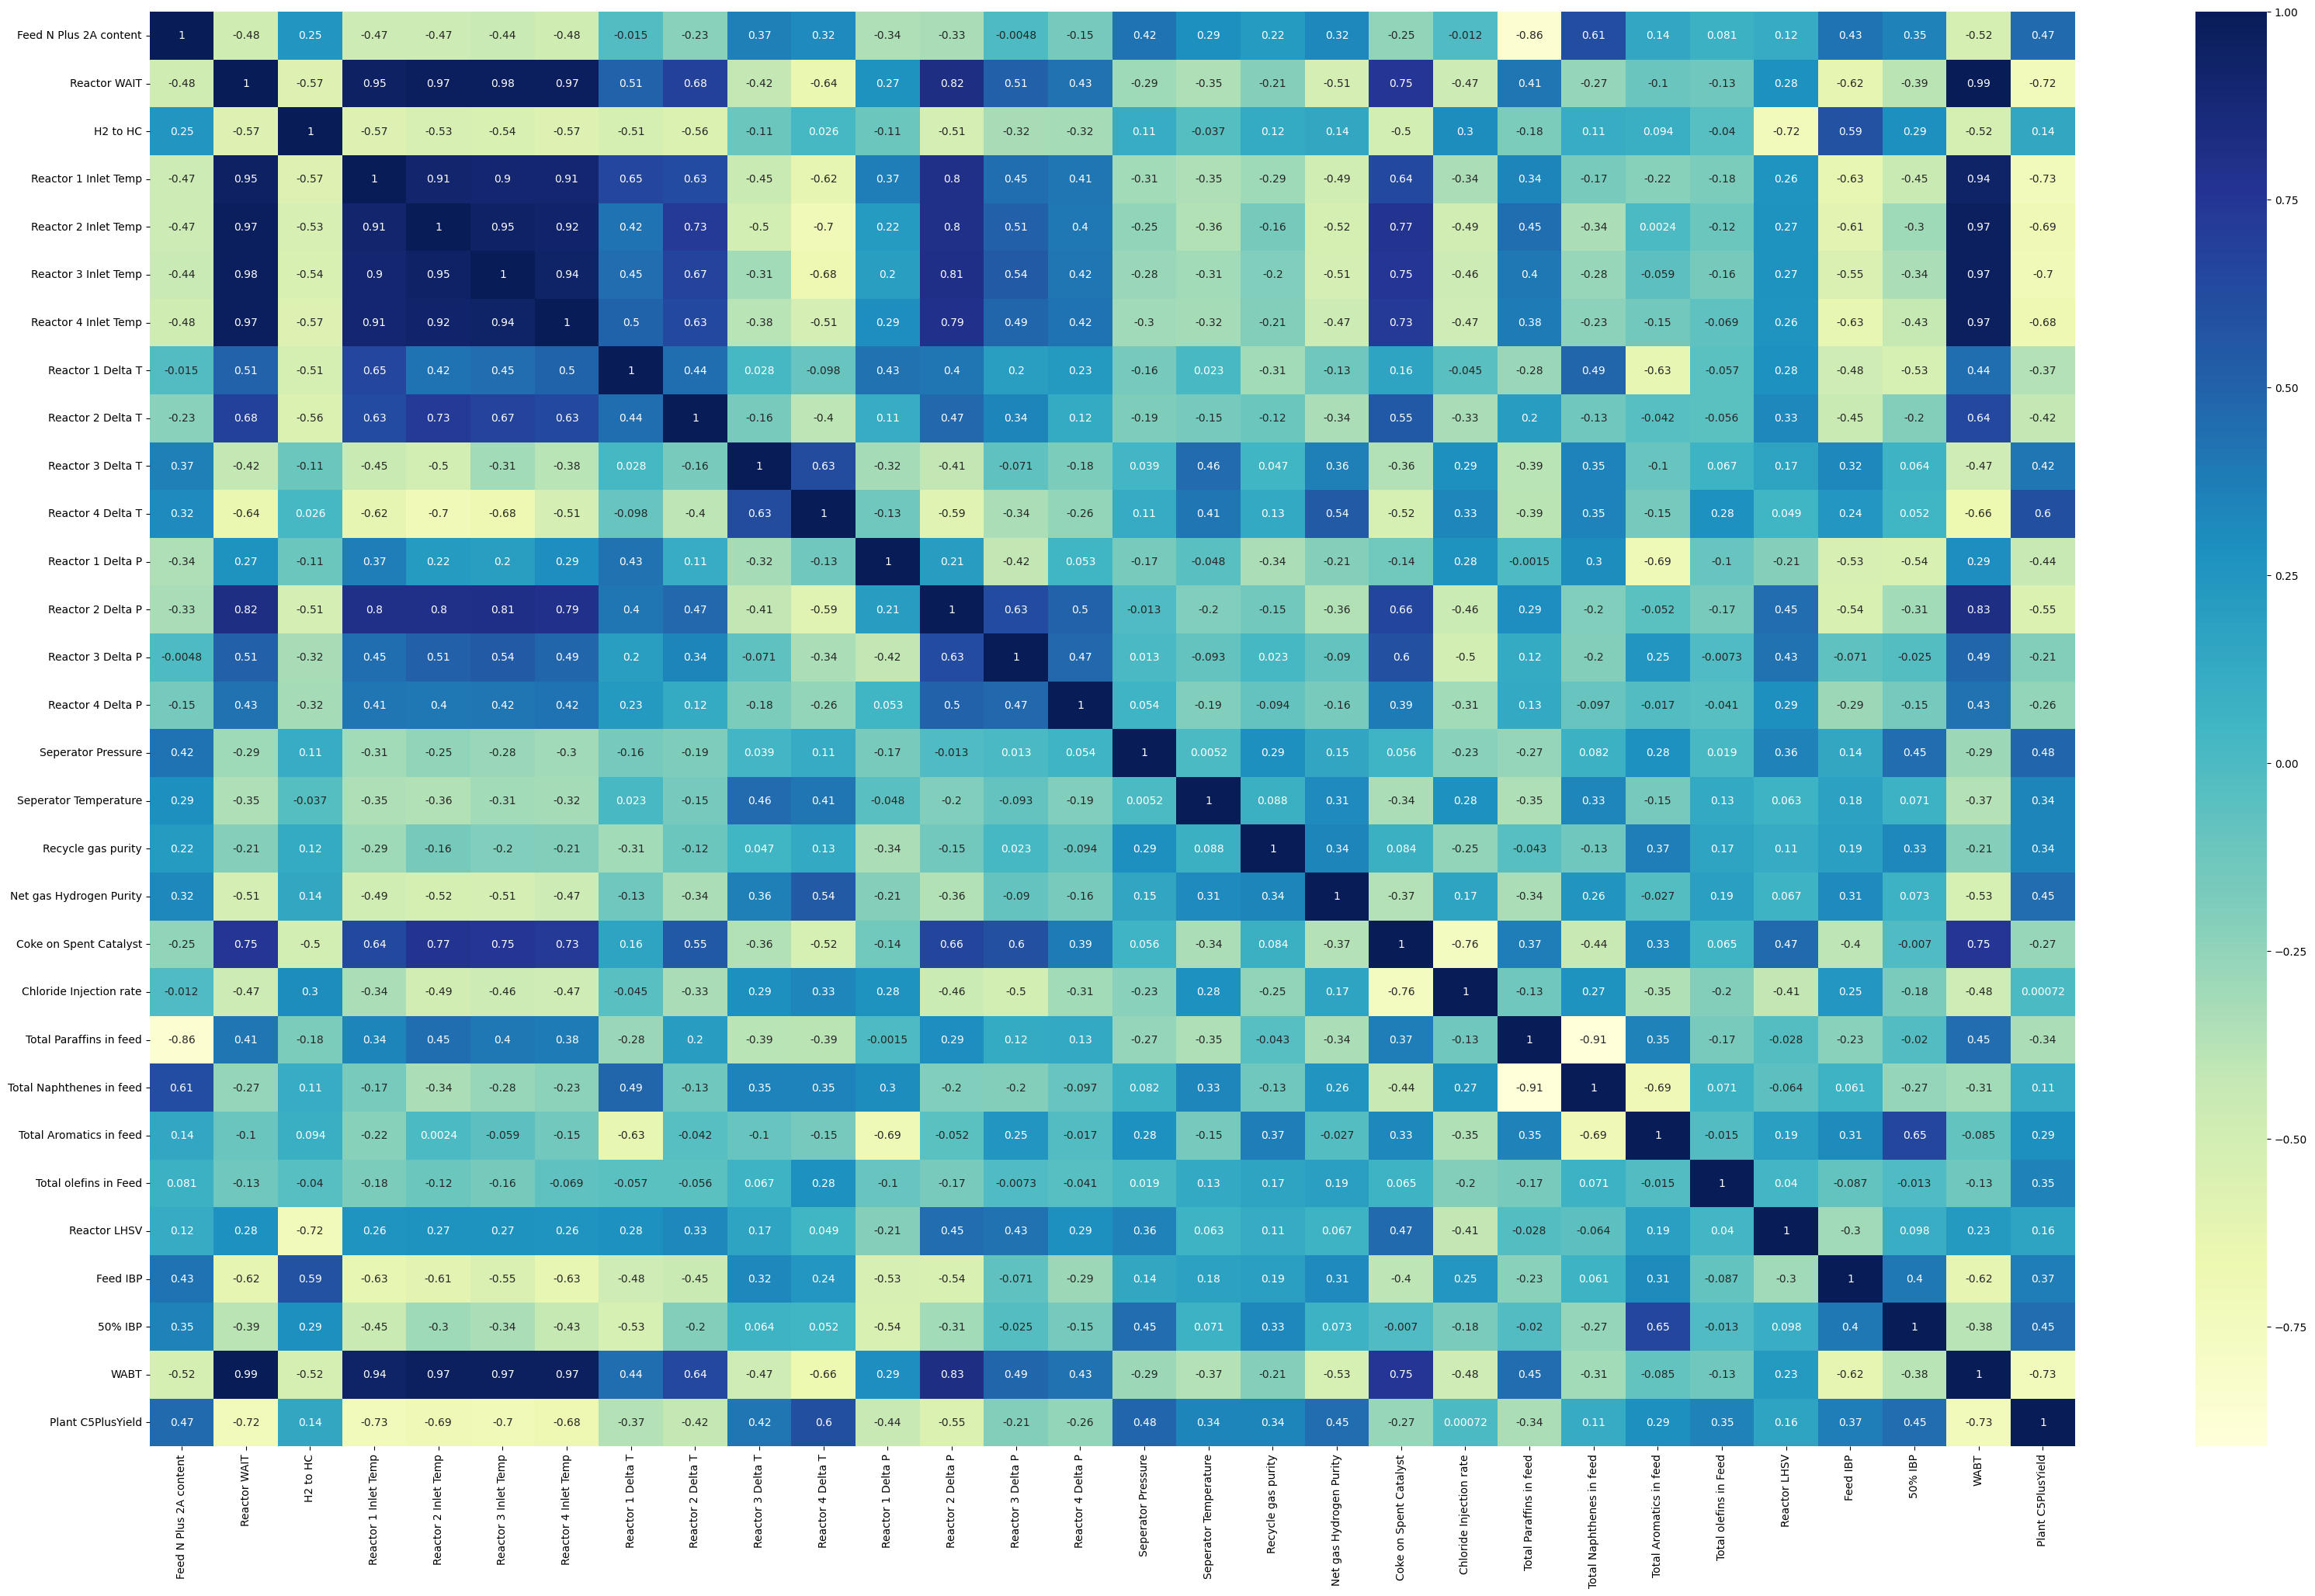

In [11]:
## Building a Heat map first and identifying highly correlated variable
figure(figsize=(40, 24))
dataplot = sns.heatmap(df_outlier_removed.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [12]:
cols_to_drop=['Reactor 1 Inlet Temp','Reactor 2 Inlet Temp', 'Reactor 3 Inlet Temp','Reactor 4 Inlet Temp',
              'Reactor 1 Delta P','Reactor 2 Delta P', 'Reactor 3 Delta P', 'Reactor 4 Delta P','Net gas Hydrogen Purity',
              'Total Naphthenes in feed', 'Total Aromatics in feed','Total olefins in Feed','WABT']
len(cols_to_drop)

13

In [13]:
df_trimmed=df_outlier_removed.drop(cols_to_drop, axis=1)
number_of_columns_dropped = df_outlier_removed.shape[1] - df_trimmed.shape[1]
number_of_columns_dropped

13

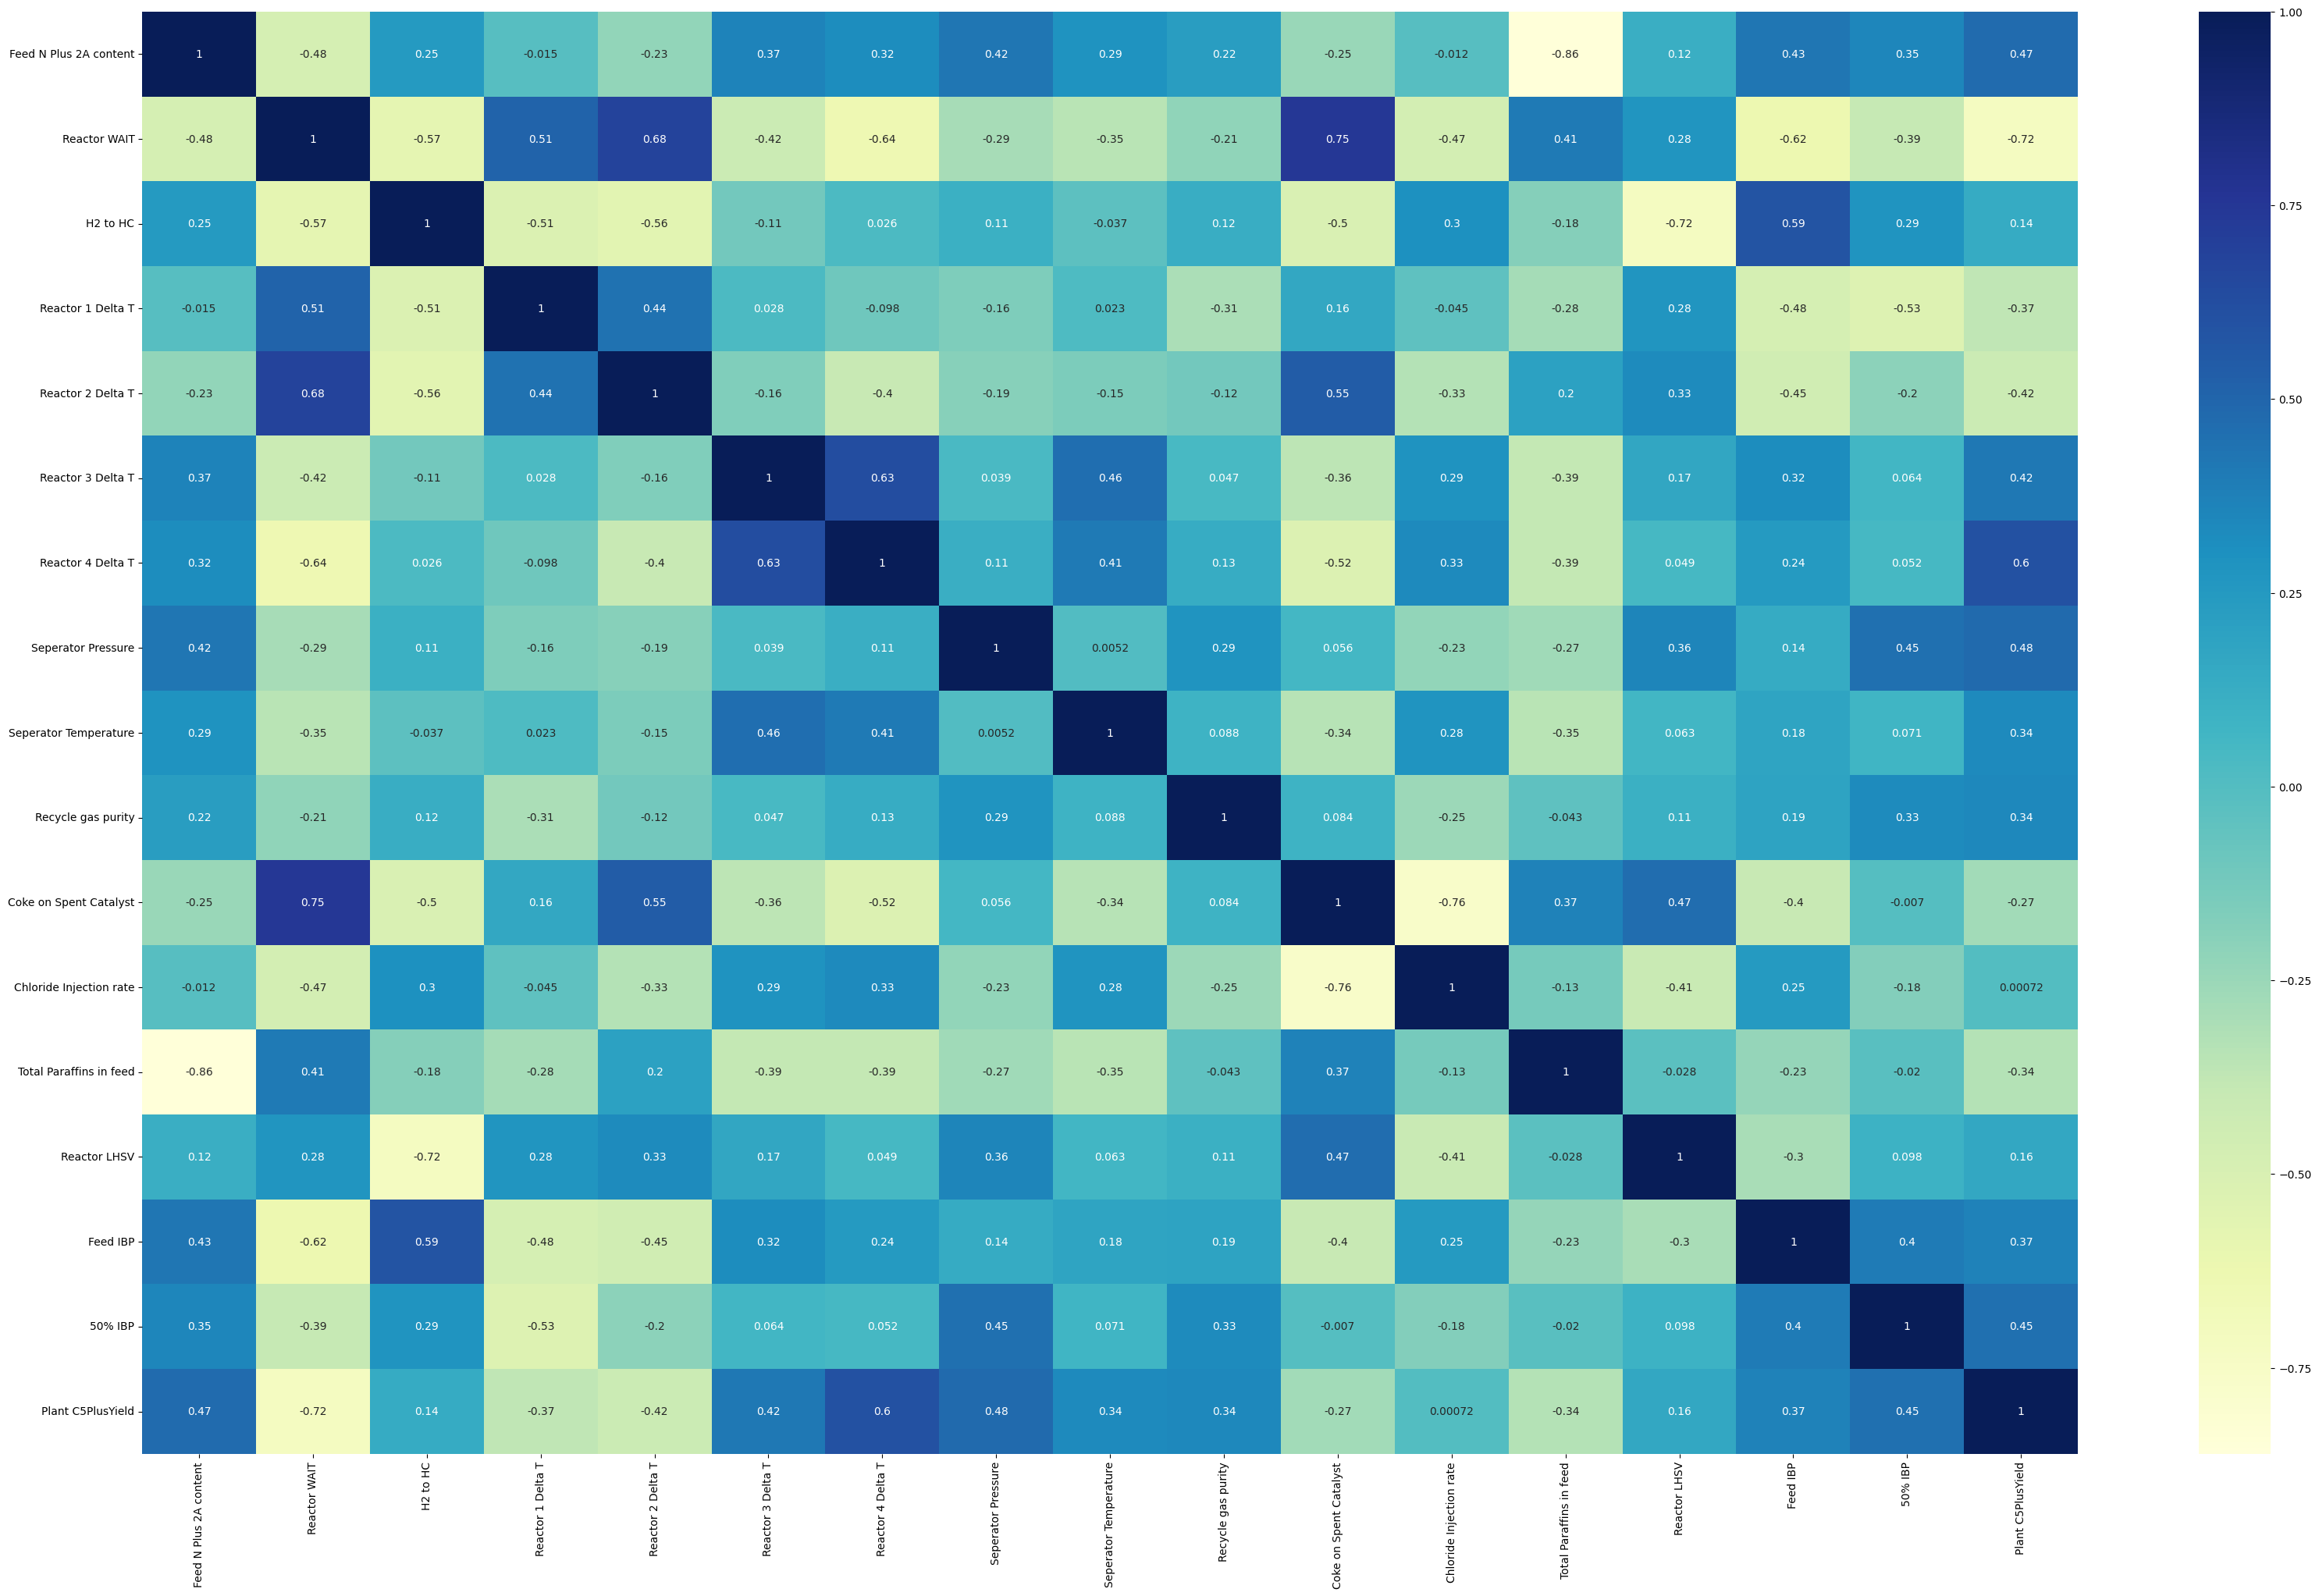

In [14]:
figure(figsize=(40, 24))
dataplot = sns.heatmap(df_trimmed.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

### 5.0 Creating a Linear regression model and checking VIF

In [15]:
# Splitting the dataset into X and y
X = df_trimmed.drop(['Plant C5PlusYield'], axis = 1)
y = df_trimmed[['Plant C5PlusYield']]

# Splitting data into Train and Test (80-20)
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.2, shuffle=True)

# Scaling the X data using StandardScaler
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(ss.fit_transform(X_test),columns = X_test.columns)

#Identifying total number of independent variables
print(f'Total number of independent variables are :  {X_train.shape[1]}')

Total number of independent variables are :  16


In [16]:
## Applying RFE on df_trimmed to get a starting point for the model
k = 10  # Select the top 15 most important variables
important_vars_lr = rfe_LinearRegression(df_trimmed, 'Plant C5PlusYield', k)

# Print the list of important variables
print(important_vars_lr)

['Reactor WAIT', 'H2 to HC', 'Reactor 4 Delta T', 'Seperator Pressure', 'Seperator Temperature', 'Coke on Spent Catalyst', 'Chloride Injection rate', 'Reactor LHSV', 'Feed IBP', '50% IBP']


In [17]:
# Concised model- First model using all columns
relevant_cols= X_train.columns
#Model 1 (Linear regression)
X_train_sm = sm.add_constant(X_train[relevant_cols])
lr = sm.OLS(y_train.values.reshape(-1,1), X_train_sm).fit()
#lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1103.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        01:29:03   Log-Likelihood:                -3547.8
No. Observations:                4499   AIC:                             7130.
Df Residuals:                    4482   BIC:                             7239.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      84.9682      0.008   1.07e+04      0.000      84.953      84.984
Feed N Plus 2A content      0.0071      0.025      0.285      0.775      -0.042       0.056
Reactor WAIT               -1.2812      0.025    -51.255      0.000      -1.330      -1.232
H2 to HC                   -0.3396      0.020    -17.002      0.000      -0.379      -0.300
Reactor 1 Delta T           0.0233      0.016      1.487      0.137      -0.007       0.054
Reactor 2 Delta T          -0.0164      0.012     -1.391      0.164      -0.040       0.007
Reactor 3 Delta T           0.0144      0.012      1.179      0.239      -0.010       0.038
Reactor 4 Delta T           0.1396      0.014      9.838      0.000       0.112       0.167
Seperator Pressure          0.1455      0.012     12.611      0.000       0.123       0.168
Seperator Temperature       0.0933      0.010      9.606      0.000       0.074       0.112
Recycle gas purity          0.0121      0.009      1.292      0.196      -0.006       0.031
Coke on Spent Catalyst      0.4090      0.020     20.549      0.000       0.370       0.448
Chloride Injection rate    -0.2346      0.014    -16.753      0.000      -0.262      -0.207
Total Paraffins in feed     0.0220      0.026      0.836      0.403      -0.030       0.074
Reactor LHSV               -0.0658      0.016     -4.022      0.000      -0.098      -0.034
Feed IBP                   -0.0369      0.013     -2.855      0.004      -0.062      -0.012
50% IBP                     0.0296      0.012      2.423      0.015       0.006       0.054
==============================================================================
Omnibus:                      722.817   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8947.121
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       9.870   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# P values are high for some variables. Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[relevant_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[relevant_cols].values, i) for i in range(X_train[relevant_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Total Paraffins in feed,10.93
0,Feed N Plus 2A content,9.89
1,Reactor WAIT,9.88
2,H2 to HC,6.31
10,Coke on Spent Catalyst,6.26
13,Reactor LHSV,4.24
3,Reactor 1 Delta T,3.88
6,Reactor 4 Delta T,3.19
11,Chloride Injection rate,3.10
14,Feed IBP,2.63


In [19]:
#Dropping a few variables
variables_to_be_dropped=['Reactor 1 Delta T','Reactor 2 Delta T','Reactor 3 Delta T','Reactor 4 Delta T',
                         'Seperator Temperature'] #dropping these as Reactor delta T have high p Value and separator temp
                                                #is highly collinear to last reactor temperature
relevant_cols = [item for item in relevant_cols if item not in variables_to_be_dropped]

In [20]:
# Fitting 2nd Model
X_train_sm = sm.add_constant(X_train[relevant_cols])
lr = sm.OLS(y_train.values.reshape(-1,1), X_train_sm).fit()
#lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1506.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        01:36:02   Log-Likelihood:                -3662.3
No. Observations:                4499   AIC:                             7349.
Df Residuals:                    4487   BIC:                             7426.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      84.9682      0.008   1.04e+04      0.000      84.952      84.984
Feed N Plus 2A content     -0.0635      0.024     -2.607      0.009      -0.111      -0.016
Reactor WAIT               -1.4291      0.018    -78.366      0.000      -1.465      -1.393
H2 to HC                   -0.4505      0.017    -25.773      0.000      -0.485      -0.416
Seperator Pressure          0.1224      0.012     10.572      0.000       0.100       0.145
Recycle gas purity          0.0354      0.009      3.750      0.000       0.017       0.054
Coke on Spent Catalyst      0.3859      0.020     19.480      0.000       0.347       0.425
Chloride Injection rate    -0.2219      0.014    -15.770      0.000      -0.249      -0.194
Total Paraffins in feed    -0.0901      0.023     -3.993      0.000      -0.134      -0.046
Reactor LHSV               -0.0587      0.017     -3.518      0.000      -0.091      -0.026
Feed IBP                   -0.0190      0.012     -1.535      0.125      -0.043       0.005
50% IBP                     0.0273      0.012      2.240      0.025       0.003       0.051
==============================================================================
Omnibus:                      641.059   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6649.723
Skew:                          -0.320   Prob(JB):                         0.00
Kurtosis:                       8.921   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#p value for Feed IBP is high. Lets check VIF
vif = pd.DataFrame()
vif['Features'] = X_train[relevant_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[relevant_cols].values, i) for i in range(X_train[relevant_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Feed N Plus 2A content,8.94
7,Total Paraffins in feed,7.66
5,Coke on Spent Catalyst,5.90
1,Reactor WAIT,5.00
2,H2 to HC,4.60
8,Reactor LHSV,4.19
6,Chloride Injection rate,2.98
9,Feed IBP,2.31
10,50% IBP,2.24
3,Seperator Pressure,2.02


In [22]:
#Dropping a few more variables
variables_to_be_dropped=['Feed IBP'] #dropping as it has high correlation with Feed composition and 50% boiling point
relevant_cols = [item for item in relevant_cols if item not in variables_to_be_dropped]

In [23]:
# Fitting Final Model
X_train_sm = sm.add_constant(X_train[relevant_cols])
lr = sm.OLS(y_train.values.reshape(-1,1), X_train_sm).fit()
#lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1656.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        01:38:29   Log-Likelihood:                -3663.5
No. Observations:                4499   AIC:                             7349.
Df Residuals:                    4488   BIC:                             7420.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      84.9682      0.008   1.04e+04      0.000      84.952      84.984
Feed N Plus 2A content     -0.0762      0.023     -3.324      0.001      -0.121      -0.031
Reactor WAIT               -1.4212      0.017    -81.271      0.000      -1.455      -1.387
H2 to HC                   -0.4578      0.017    -27.205      0.000      -0.491      -0.425
Seperator Pressure          0.1258      0.011     11.068      0.000       0.104       0.148
Recycle gas purity          0.0358      0.009      3.795      0.000       0.017       0.054
Coke on Spent Catalyst      0.3835      0.020     19.417      0.000       0.345       0.422
Chloride Injection rate    -0.2235      0.014    -15.921      0.000      -0.251      -0.196
Total Paraffins in feed    -0.0997      0.022     -4.594      0.000      -0.142      -0.057
Reactor LHSV               -0.0600      0.017     -3.596      0.000      -0.093      -0.027
50% IBP                     0.0273      0.012      2.241      0.025       0.003       0.051
==============================================================================
Omnibus:                      629.745   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6514.378
Skew:                          -0.303   Prob(JB):                         0.00
Kurtosis:                       8.864   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# defining a function to Test the error of predicted vs actual value
def calculate_prediction_error(X_train, y_train, lr_model):
    # Predict the target variable using the trained model
    y_train_pred = lr_model.predict(X_train)
    
    # Create a DataFrame for predicted values
    y_train_pred = pd.DataFrame({'Predicted': y_train_pred})
    
    # Reset the index of y_train and drop the current index
    y_train_act = y_train.reset_index(drop=True)
    
    # Concatenate actual and predicted values
    y_train_error = pd.concat([y_train_act, y_train_pred], axis=1, join="inner")
    
    # Calculate the error
    y_train_error['Error'] = y_train_error['Plant C5PlusYield'] - y_train_error['Predicted']
    
    # Calculate the R2 score
    r2_score_value = r2_score(y_train, y_train_pred)
    mae = mean_absolute_error(y_train, y_train_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Create a DataFrame to store the evaluation metrics
    evaluation_metrics = pd.DataFrame({'R2 Score': [r2_score_value],
                                       'MAE': [mae],
                                       'RMSE': [rmse]})

        
    # Plot the distribution of error terms
    fig = plt.figure()
    sns.distplot(y_train_error['Error'], bins=20)
    fig.suptitle('Error Terms Distribution', fontsize=10)
    plt.xlabel('Error Value', fontsize=10)
    plt.grid(True)
    
    return y_train_error, r2_score_value, evaluation_metrics

   Plant C5PlusYield  Predicted     Error
0              86.67  86.530114  0.139886
1              82.25  82.833754 -0.583754
2              82.98  83.318286 -0.338286
3              86.97  86.296869  0.673131
4              83.95  83.033286  0.916714


,R2 Score,MAE,RMSE
0,0.78675,0.387841,0.54627


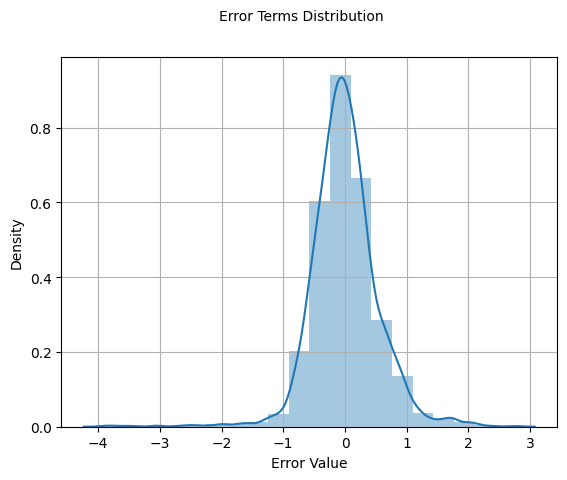

In [26]:
# the above defined function on X_train_sm and y_train as the DataFrames, and lr is the trained Linear Regression model
y_train_error, r2_score_value,evaluation_metric_lr_train = calculate_prediction_error(X_train_sm, y_train, lr)
#print("R2 Score:", r2_score_value)
print(y_train_error.head())
evaluation_metric_lr_train


#### Checkpoint
Error terms are normally distributed.

   Plant C5PlusYield  Predicted     Error
0              85.72  84.497737  1.222263
1              86.27  85.877906  0.392094
2              85.94  86.052058 -0.112058
3              85.07  85.311617 -0.241617
4              84.00  83.106448  0.893552


,R2 Score,MAE,RMSE
0,0.787079,0.400294,0.541646


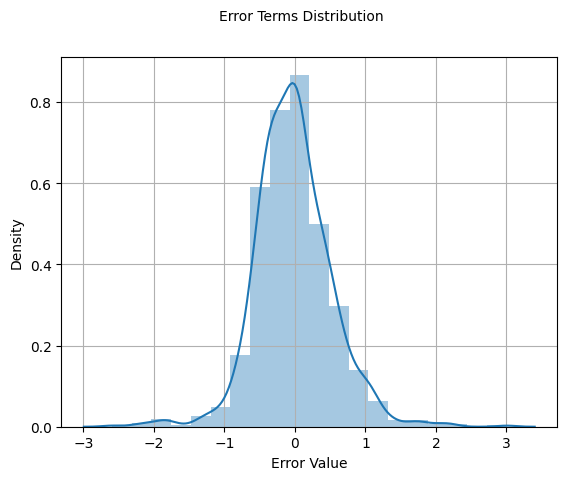

In [27]:
## Fitting model on Test data and analysisng
X_test_final=X_test[relevant_cols]
X_test_final.head()
X_test_sm=sm.add_constant(X_test_final)
X_test_sm.head()
# using X_test_sm and y_test as the DataFrames, and lr is the trained Linear Regression model
y_test_error, r2_score_value,evaluation_metric_lr_test = calculate_prediction_error(X_test_sm, y_test, lr)
#print("R2 Score:", r2_score_value)
print(y_test_error.head())
evaluation_metric_lr_test

In [28]:
evaluation_metric_linearRegression= pd.concat([evaluation_metric_lr_train, evaluation_metric_lr_test], axis=1)
evaluation_metric_linearRegression.columns = ['R2 Score (Train)', 'MAE (Train)', 'RMSE (Train)', 'R2 Score (Test)',
                                              'MAE (Test)', 'RMSE (Test)']
evaluation_metric_linearRegression['Method'] = 'Linear Regression'
evaluation_metric_linearRegression = evaluation_metric_linearRegression.reindex(columns=['Method', 'MAE (Train)', 'MAE (Test)',
                                                                                         'RMSE (Train)', 'RMSE (Test)', 
                                                                                         'R2 Score (Train)', 'R2 Score (Test)'])
evaluation_metric_linearRegression

,Method,MAE (Train),MAE (Test),RMSE (Train),RMSE (Test),R2 Score (Train),R2 Score (Test)
0,Linear Regression,0.387841,0.400294,0.54627,0.541646,0.78675,0.787079


### Visualization

In [29]:
## Defining a function to plot the error analysis

def plot_error_analysis(df_error,title):
    

    # Plot 1
    df_plot = df_error.drop('Error', axis=1)
    df_plot['x1'] = df_plot.index
    ax1 = df_plot.plot(x='x1', figsize=(16, 6))
    ax2 = df_plot.plot.scatter(x='x1', y=['Plant C5PlusYield'], marker='^', ax=ax1)
    ax3 = df_plot.plot.scatter(x='x1', y=['Predicted'], marker='*', ax=ax1, color='#ff7f0e')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Value')
    #plt.grid(True)

    # Plot 2
    plt.figure(figsize=(16, 10))
    df_error['x1'] = df_error.index
    plt.scatter(df_error['x1'], df_error['Plant C5PlusYield'], c='b', marker='^', label='Train')
    plt.scatter(df_error['x1'], df_error['Predicted'], c='r', marker='*', label='Pred')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend(loc='upper left')
    plt.show()  # Add this line to show the second plot

In [30]:
# Defining a function for barplots
def bar_plot_evalmetrics(dfs,metrics):
    combined_eval_metrics = pd.concat(dfs, axis=0)
    combined_eval_metrics = combined_eval_metrics.reset_index(drop=True)

    # Set the 'Method' column as the index
    df_evalmet_plot = combined_eval_metrics.set_index('Method')

    # Define the evaluation metrics to loop over
    metrics = metrics

    # Create subplots for each metric
    fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 15))

    # Iterate over the metrics and create subplots
    for i, metric in enumerate(metrics):
        # Get the column names for the metric
        columns = [col for col in df_evalmet_plot.columns if metric in col]

        # Plot the metric for Train/Test
        df_evalmet_plot[columns].plot(kind='bar', ax=axes[i], rot=0,grid=False)
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel(metric)
        axes[i].set_title(f'{metric} (Train/Test)')


        # Add value labels on top of each bar
        for container in axes[i].containers:
            axes[i].bar_label(container, label_type='center', color='black')

    # Adjust the layout
    plt.tight_layout()
    plt.show()
    return combined_eval_metrics    

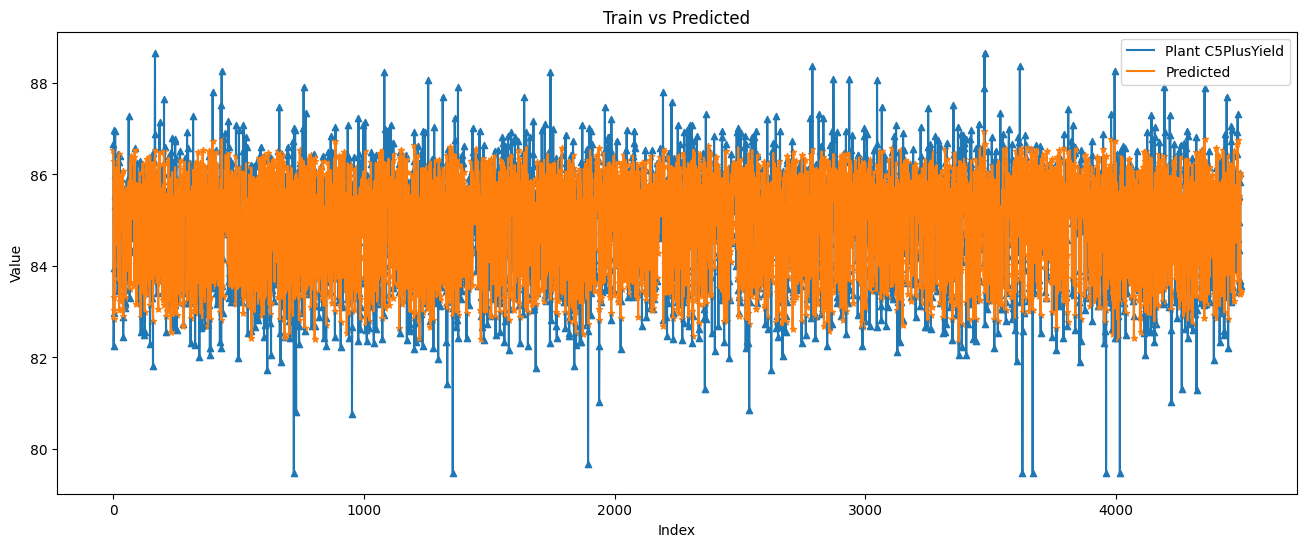

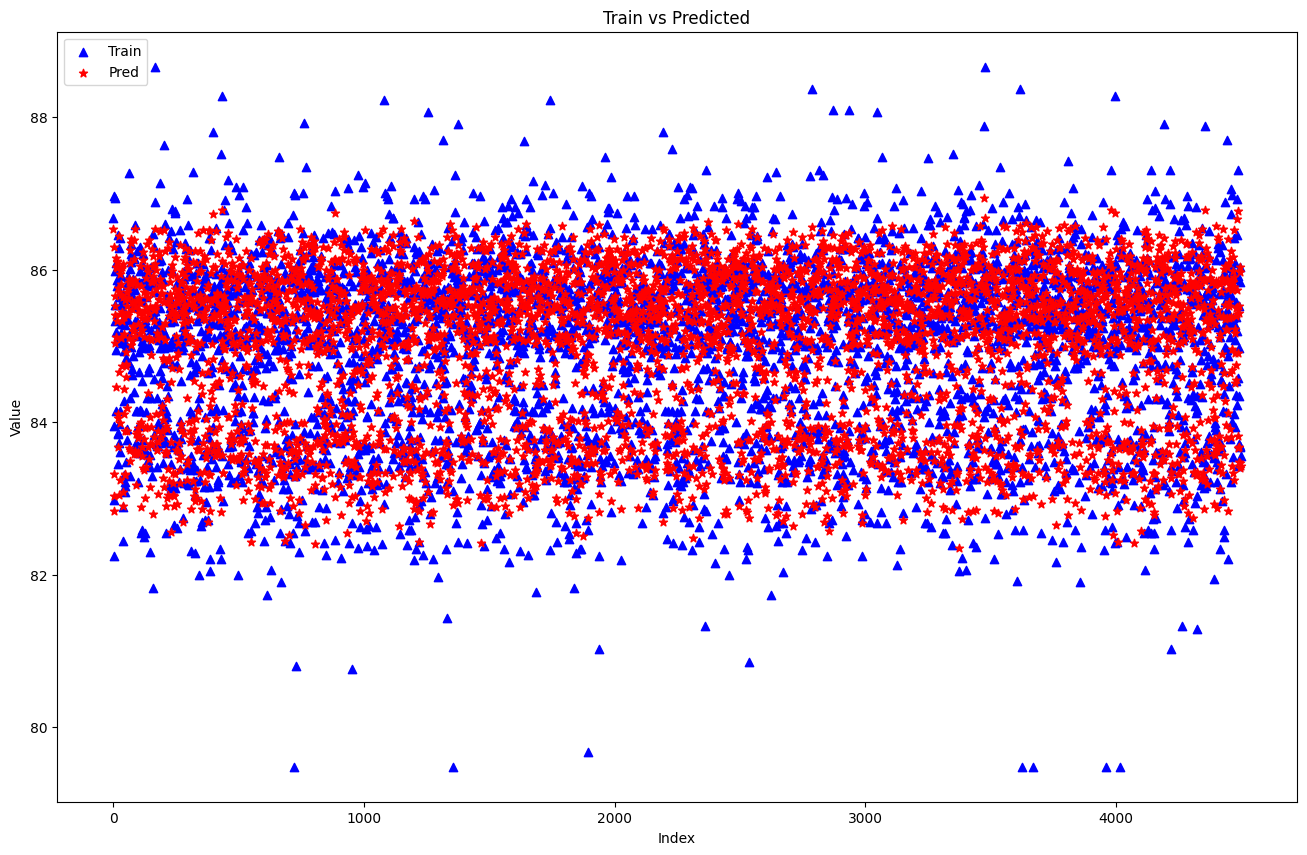

In [31]:
# Plotting for Actual vs Predicted for Train data
plot_error_analysis(y_train_error,'Train vs Predicted')

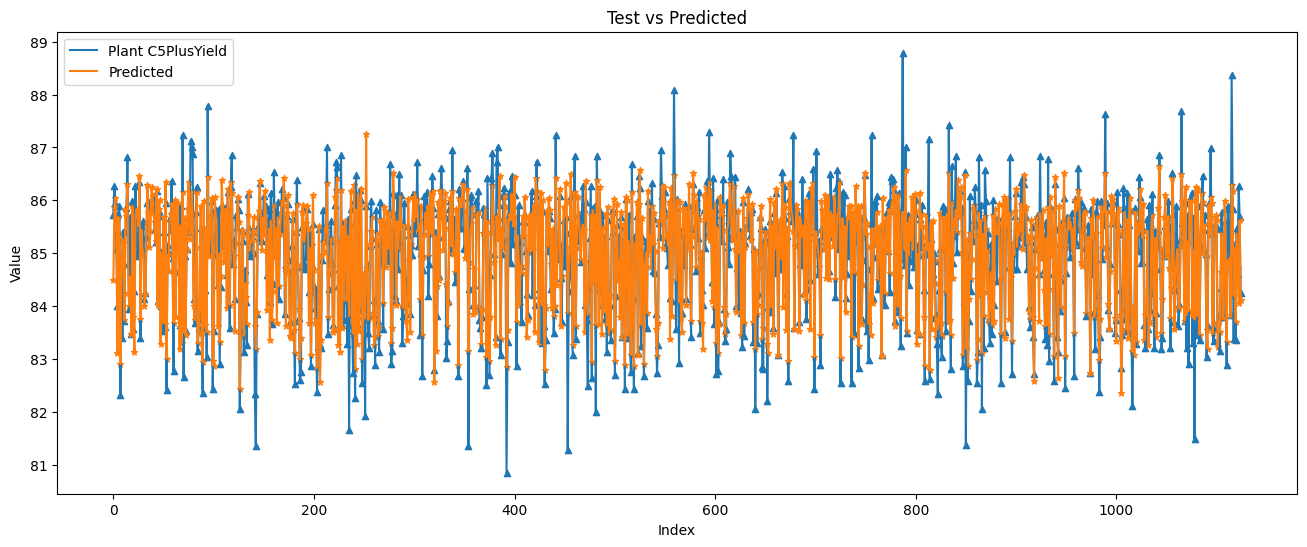

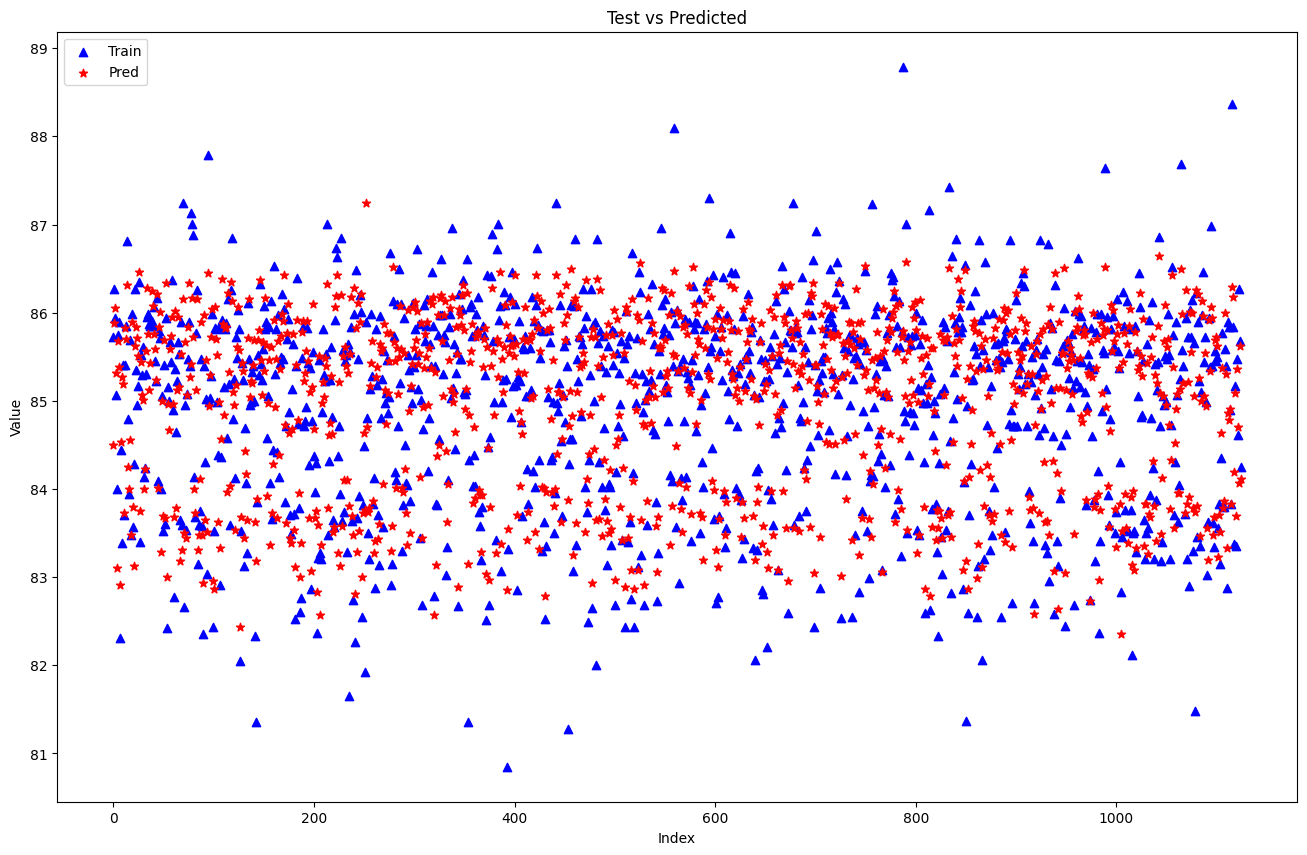

In [32]:
# Plotting for Actual vs Predicted for Test data
plot_error_analysis(y_test_error, 'Test vs Predicted')

## 6.0 Polynomial Regression Model 

In [34]:
X_relevant=X_train_sm.drop('const',axis=1)
x=list(X_relevant.columns)
y=('Plant C5PlusYield')
x.append(y)
df_final=df_trimmed[x]
df_final.head()

,Feed N Plus 2A content,Reactor WAIT,H2 to HC,Seperator Pressure,Recycle gas purity,Coke on Spent Catalyst,Chloride Injection rate,Total Paraffins in feed,Reactor LHSV,50% IBP,Plant C5PlusYield
0,45.46,1004.48,3.28,30.83,78.67,3.82,2.59,64.91,1.62,250.57,83.24
1,44.22,1004.54,3.17,30.32,78.67,3.56,2.64,65.89,1.62,247.78,83.20
2,44.22,1004.54,3.17,30.27,78.67,3.56,2.58,65.89,1.62,247.78,83.20
3,45.49,1002.61,3.46,32.56,77.88,3.82,2.60,63.35,1.62,249.98,83.46
4,45.46,1004.34,3.31,30.39,78.67,3.82,2.60,64.91,1.62,250.57,83.33


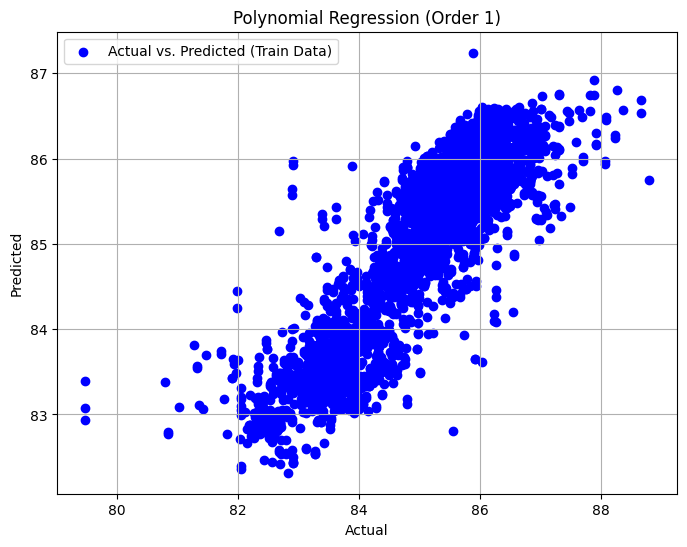

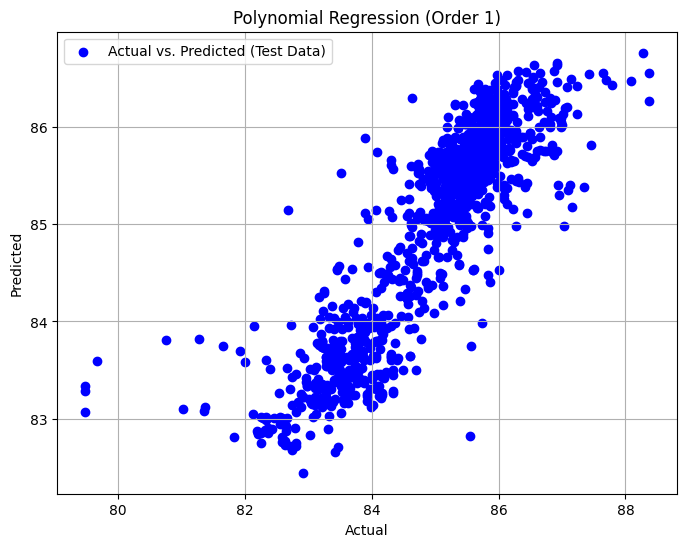

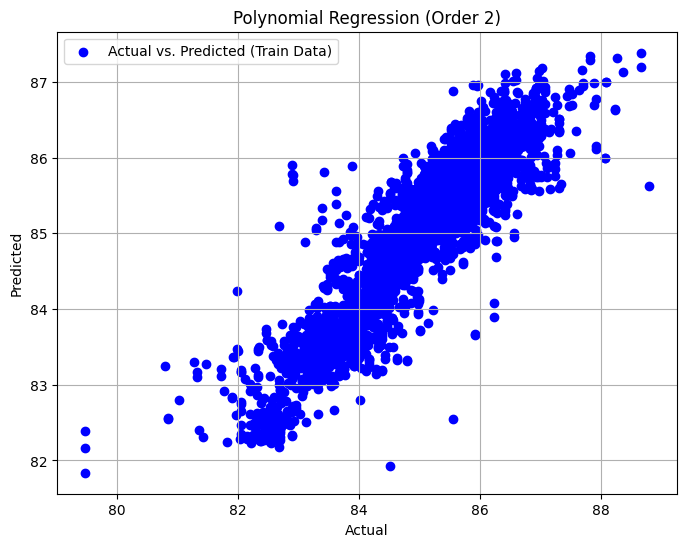

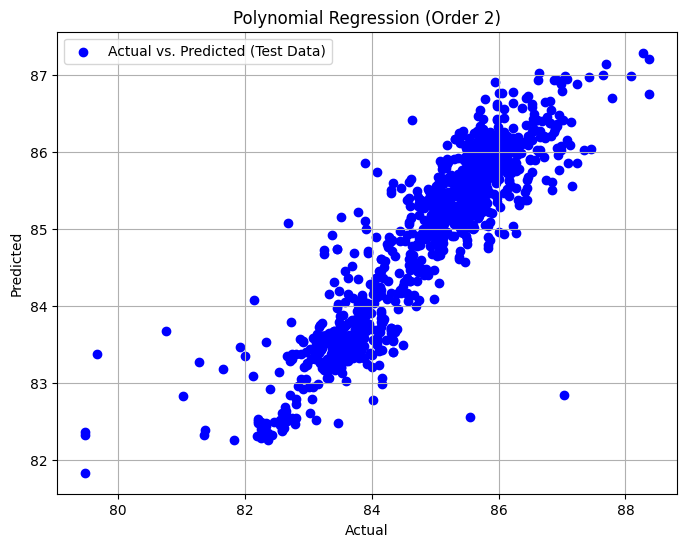

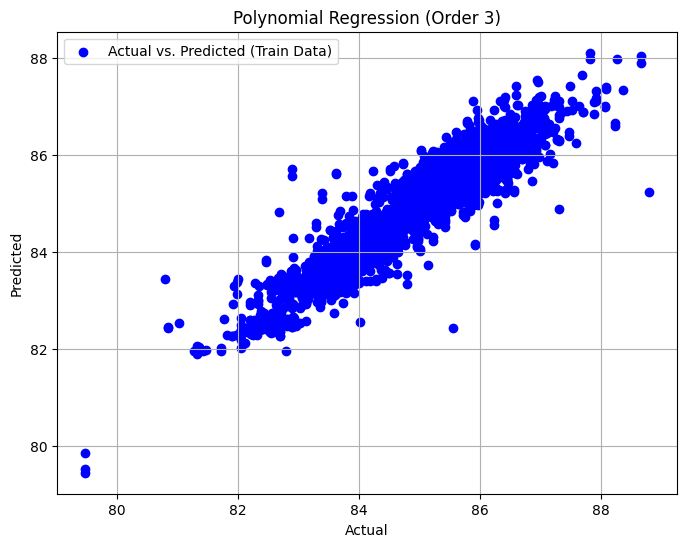

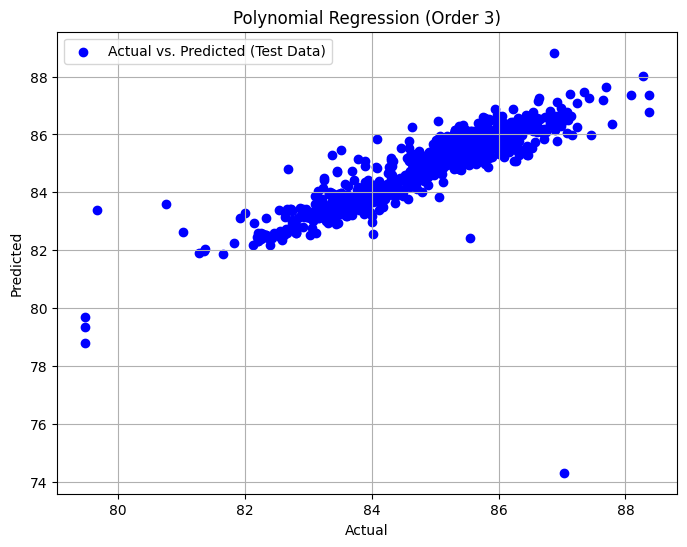

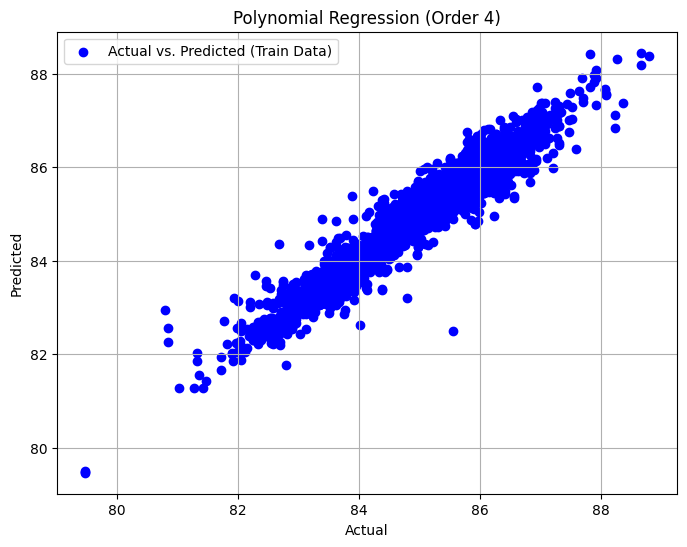

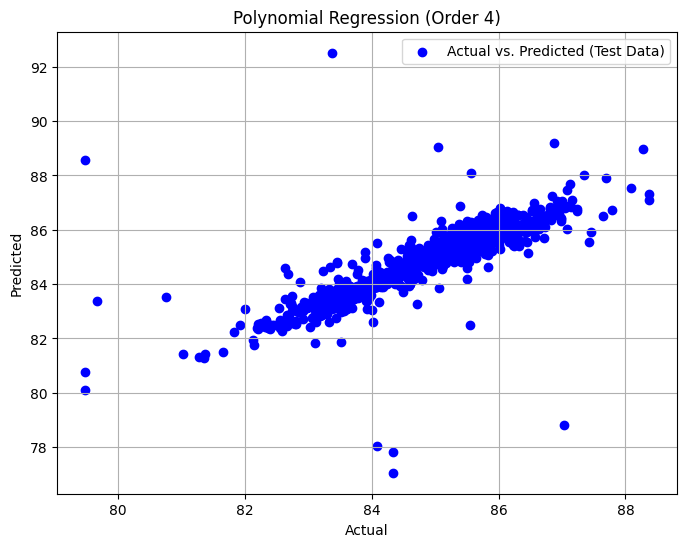

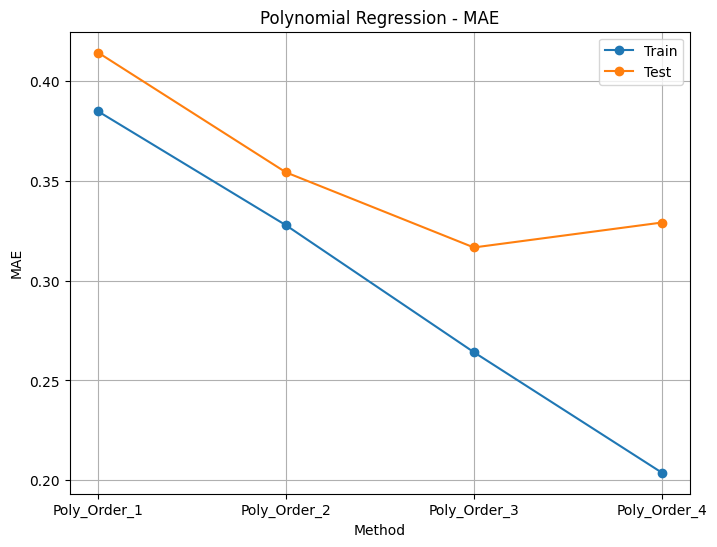

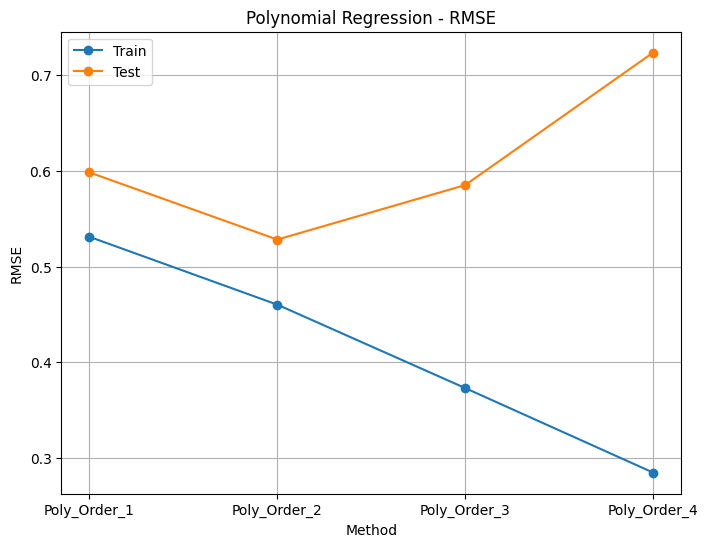

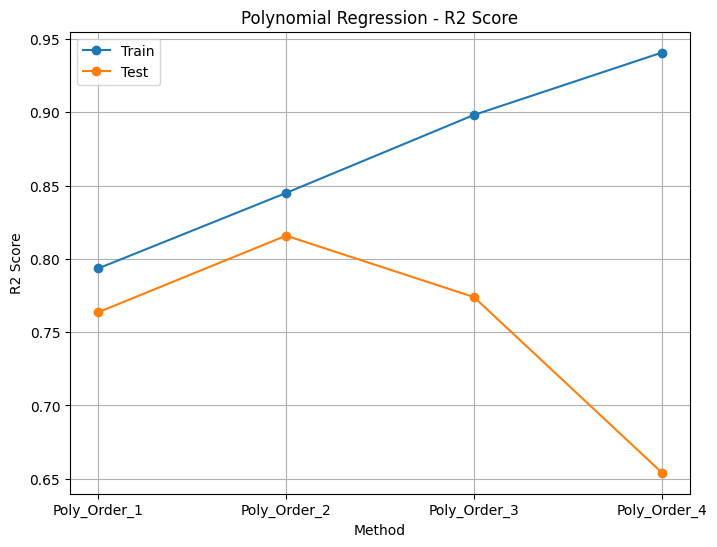

,Method,MAE (Train),MAE (Test),RMSE (Train),RMSE (Test),R2 Score (Train),R2 Score (Test)
0,Poly_Order_1,0.384836,0.414271,0.531045,0.598392,0.793415,0.763524
1,Poly_Order_2,0.327751,0.354248,0.460104,0.528158,0.844922,0.815778
2,Poly_Order_3,0.264133,0.316611,0.372869,0.585166,0.898153,0.773862
3,Poly_Order_4,0.203799,0.329090,0.284506,0.723696,0.940705,0.654118


In [35]:
# Create a list of dictionaries to store the results
results = []
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('Plant C5PlusYield', axis=1), df_final['Plant C5PlusYield'], test_size=0.2, random_state=42)




# Test polynomial regression models from 1st to 4th order
for order in range(1, 5):

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=order)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    
    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict the target variable for train and test data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)


    # Calculate Metrics for train and test data
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
                                    
    
    # Plot the actual vs. predicted values for train data
    plt.figure(figsize=(8,6))
    plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted (Train Data)')
    plt.title(f'Polynomial Regression (Order {order})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot the actual vs. predicted values for test data
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs. Predicted (Test Data)')
    plt.title(f'Polynomial Regression (Order {order})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Append the results to the list
    results.append({'Method': 'Poly_Order_'+str(order), 'MAE (Train)': mae_train, 'MAE (Test)': mae_test,
                    'RMSE (Train)': rmse_train, 'RMSE (Test)': rmse_test,
                    'R2 Score (Train)': r2_train, 'R2 Score (Test)': r2_test})

# Convert the list of dictionaries into a DataFrame
poly_evaluation_metrics_results = pd.DataFrame(results)

# Create plots for MAE, RMSE, and R2
evaluation_metrics = ['MAE', 'RMSE', 'R2 Score']

for metric in evaluation_metrics:
    plt.figure(figsize=(8, 6))
    plt.plot(poly_evaluation_metrics_results['Method'], poly_evaluation_metrics_results[f'{metric} (Train)'], marker='o', label='Train')
    plt.plot(poly_evaluation_metrics_results['Method'], poly_evaluation_metrics_results[f'{metric} (Test)'], marker='o', label='Test')
    plt.title(f'Polynomial Regression - {metric}')
    plt.xlabel('Method')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

# Print the DataFrame
poly_evaluation_metrics_results

## 7.0 Ridge Regression, Lasso and Elastic Net

In [36]:
## Defining a function Ridge, Lasso and Elastic net
def grid_search_regression(model_name, param_grid):
    df_temp = df_final.copy()
    X = df_temp.drop('Plant C5PlusYield', axis=1)
    y = df_temp['Plant C5PlusYield']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) 

    # Create the regressor object based on the model name
    if model_name == "Lasso":
        model = Lasso()
    elif model_name == "Ridge":
        model = Ridge()
    elif model_name == "ElasticNet":
        model = ElasticNet()
    else:
        raise ValueError("Invalid model name. Supported models: Lasso, Ridge, ElasticNet")

    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=10)
    grid_search.fit(X_train, y_train)
    


    # Train the Ridge regression model with the best hyperparameters
    best_temp = grid_search.best_estimator_
    best_temp.fit(X_train, y_train)

    # Perform cross-validation to evaluate the model
    cross_val_scores = cross_val_score(best_temp, X_scaled, y, cv=10, scoring='r2')

    # Predict on train and test data
    y_train_pred = best_temp.predict(X_train)
    y_test_pred = best_temp.predict(X_test)

    # Calculate R2 scores for train and test data
#     train_r2 = r2_score(y_train, y_train_pred)
#     test_r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))    

    #Evaluation Metrics
    evaluation_metrics = pd.DataFrame({'Method':[model_name],'R2 Score (Train)': [r2_train], 'R2 Score (Test)':[r2_test],
                                           'MAE (Train)': [mae_train], 'MAE (Test)':[mae_test],
                                           'RMSE (Train)': [rmse_train], 'RMSE (Test)':[rmse_test]})
    
    # Plot actual vs predicted for train data
    plt.scatter(y_train, y_train_pred, c='b', marker='^', label='Train')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted (Train Data)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot actual vs predicted for test data
    plt.scatter(y_test, y_test_pred, c='r', marker='*', label='Test')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted (Test Data)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Best parameters: ", grid_search.best_params_)
    print("Best R-squared score: %.3f" % grid_search.best_score_)
#     print("Train R2 Score: ", r2_train)
#     print("Test R2 Score: ", r2_test)
    print("Cross-validation R2 Scores: ", cross_val_scores)
    print("Average Cross-validation R2 Score: ", np.mean(cross_val_scores))
    print('-'*100)
    return evaluation_metrics                                         

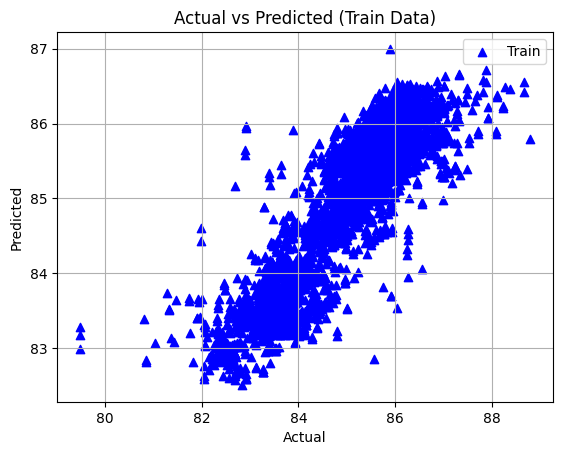

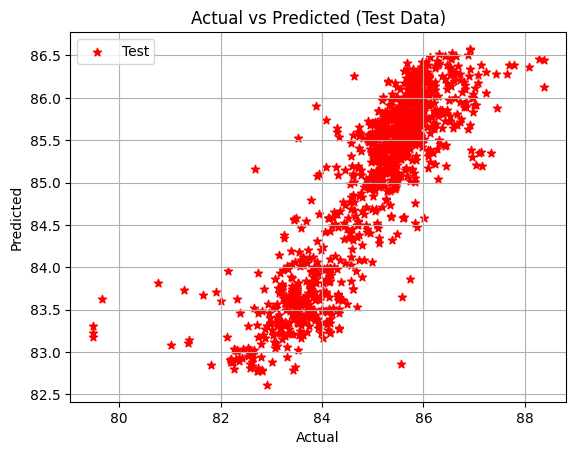

Best parameters:  {'alpha': 0.01}
Best R-squared score: 0.789
Cross-validation R2 Scores:  [0.37669296 0.54738868 0.74818314 0.77649482 0.70957386 0.64528851
 0.61882768 0.63359333 0.17710126 0.20905294]
Average Cross-validation R2 Score:  0.5442197184583389
----------------------------------------------------------------------------------------------------


In [37]:
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
eval_metric_lasso=grid_search_regression("Lasso", lasso_param_grid)

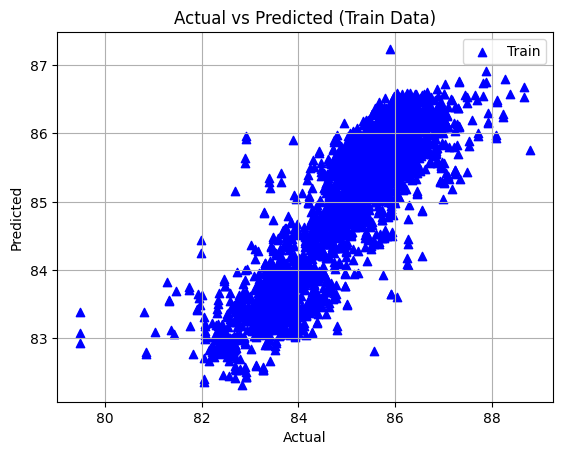

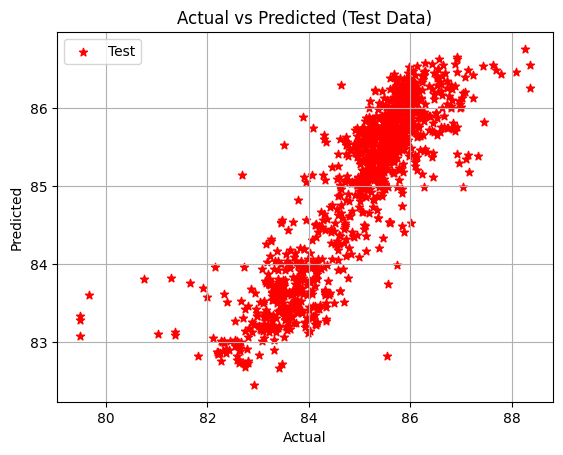

Best parameters:  {'alpha': 1.0}
Best R-squared score: 0.791
Cross-validation R2 Scores:  [0.36495254 0.53653727 0.74918257 0.77914956 0.71381132 0.64491639
 0.6168163  0.63089484 0.1917863  0.25169991]
Average Cross-validation R2 Score:  0.5479747000196314
----------------------------------------------------------------------------------------------------


In [38]:
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
eval_metric_ridge=grid_search_regression("Ridge", ridge_param_grid)

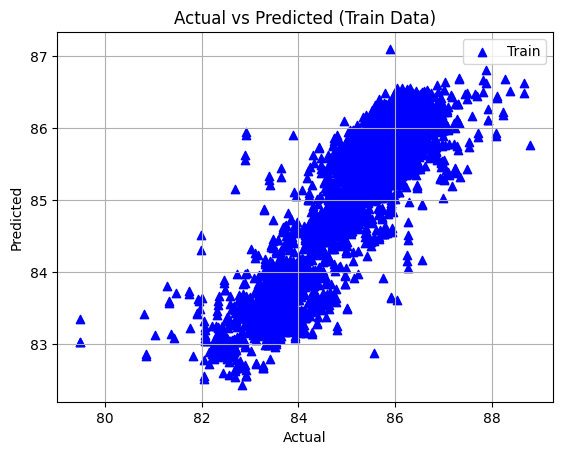

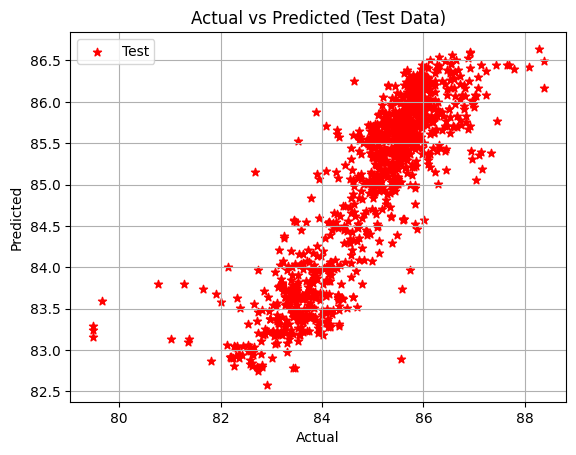

Best parameters:  {'alpha': 0.01, 'l1_ratio': 0}
Best R-squared score: 0.790
Cross-validation R2 Scores:  [0.34294691 0.54052915 0.75156681 0.77753606 0.71345866 0.64625879
 0.62104479 0.63338587 0.18598211 0.22176452]
Average Cross-validation R2 Score:  0.5434473672297285
----------------------------------------------------------------------------------------------------


In [39]:
elasticnet_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0,0.25, 0.5, 0.75, 1]}
eval_metric_elastic=grid_search_regression("ElasticNet", elasticnet_param_grid)

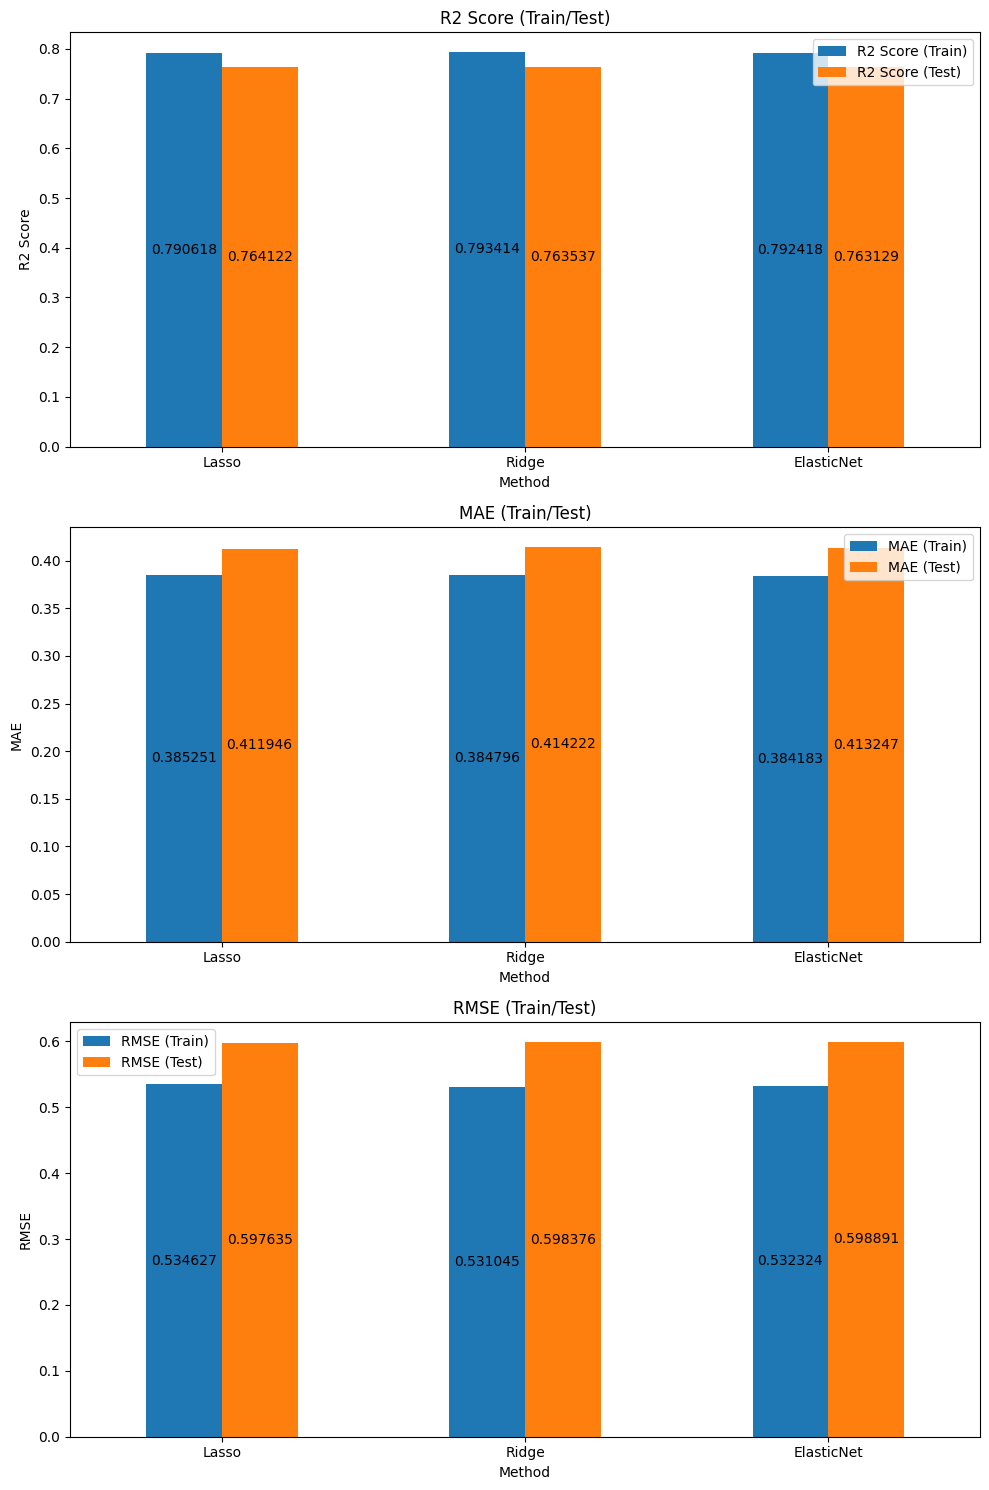

In [40]:
dfs_RidgeLassoElastic=[eval_metric_lasso, eval_metric_ridge, eval_metric_elastic]
metrics = ['R2 Score', 'MAE', 'RMSE']
eval_metric_RidgeLasso_Elastic=bar_plot_evalmetrics(dfs_RidgeLassoElastic,metrics)

In [54]:
eval_metric_RidgeLasso_Elastic

,Method,R2 Score (Train),R2 Score (Test),MAE (Train),MAE (Test),RMSE (Train),RMSE (Test)
0,Lasso,0.790618,0.764122,0.385251,0.411946,0.534627,0.597635
1,Ridge,0.793414,0.763537,0.384796,0.414222,0.531045,0.598376
2,ElasticNet,0.792418,0.763129,0.384183,0.413247,0.532324,0.598891


## 8.0 Bagging and Boosting

### 8.1 XGBoost, LGBM and Bagging- Without Cross Validation

In [41]:
def XRegressor_TrainTest(regressor):
    # Loading Data
    df_temp = df_final.copy()
    X = df_temp.drop('Plant C5PlusYield', axis=1)
    y = df_temp['Plant C5PlusYield']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    model = regressor()

    # Fit the Regressor model on the training set
    model.fit(X_train, y_train)
    # Predict on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    model_name=str(regressor.__name__).upper()
    
    # Calculate the R-squared score on the test set
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))    

    #Evaluation Metrics
    evaluation_metrics = pd.DataFrame({'Method':[model_name],'R2 Score (Train)': [r2_train], 'R2 Score (Test)':[r2_test],
                                           'MAE (Train)': [mae_train], 'MAE (Test)':[mae_test],
                                           'RMSE (Train)': [rmse_train], 'RMSE (Test)':[rmse_test]})
    return evaluation_metrics
    

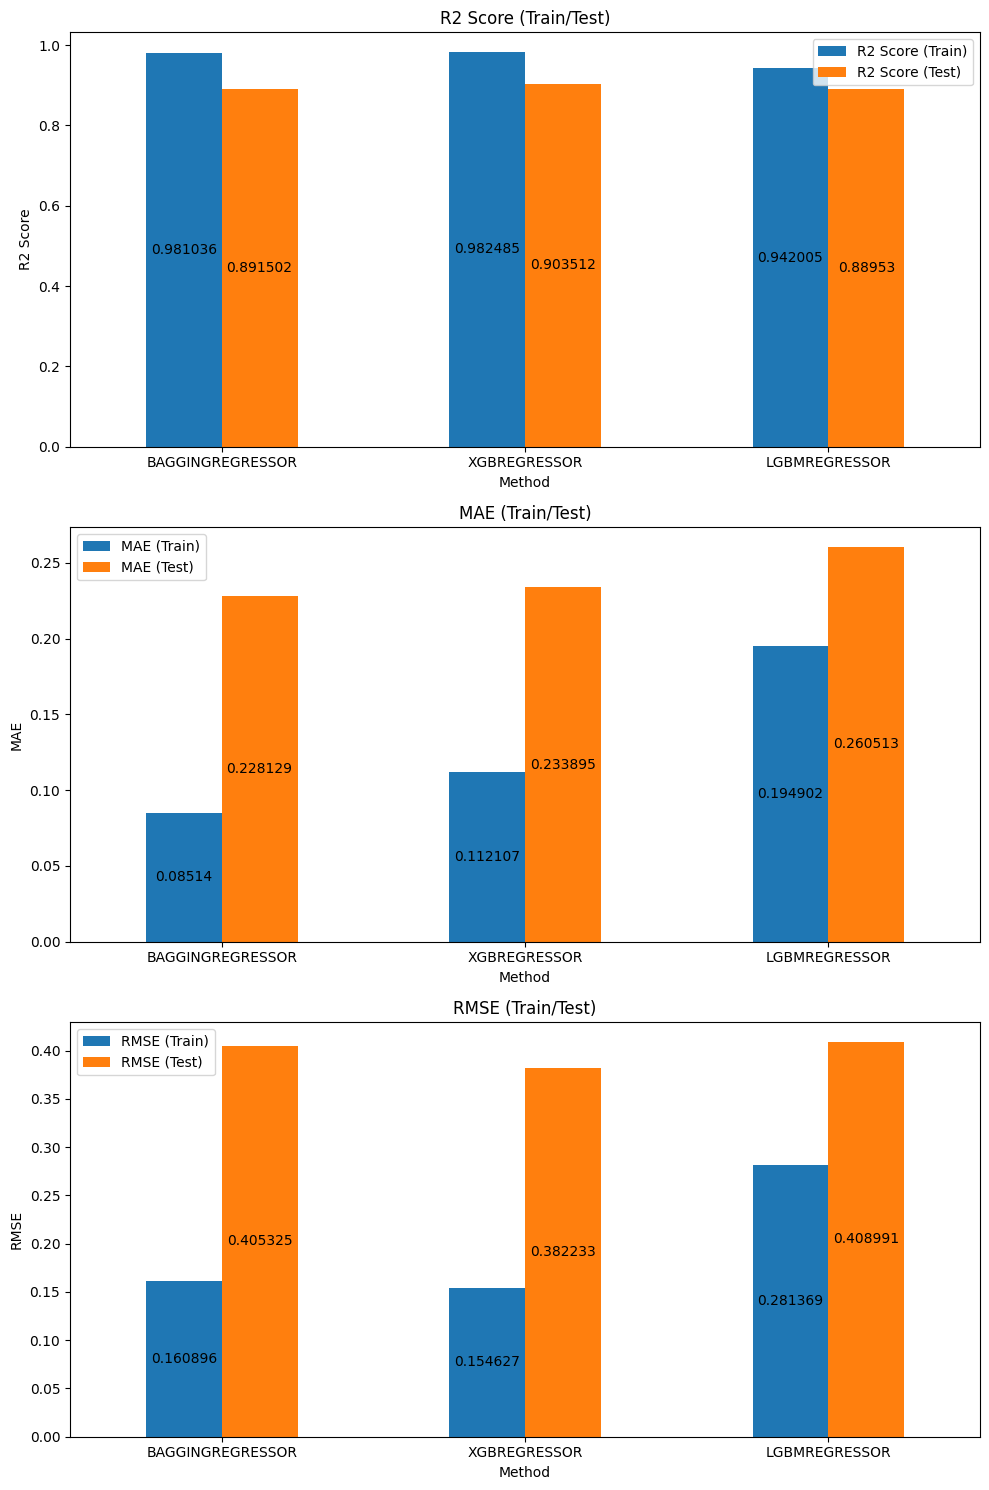

In [42]:
eval_metric_bagging=XRegressor_TrainTest(BaggingRegressor)
eval_metric_XGB=XRegressor_TrainTest(XGBRegressor)
eval_metric_LGBM=XRegressor_TrainTest(LGBMRegressor)
dfs_BaggingBoosting=[eval_metric_bagging, eval_metric_XGB, eval_metric_LGBM]
metrics = ['R2 Score', 'MAE', 'RMSE']
eval_metric_BaggingBoosting=bar_plot_evalmetrics(dfs_BaggingBoosting,metrics)

In [43]:
eval_metric_BaggingBoosting

,Method,R2 Score (Train),R2 Score (Test),MAE (Train),MAE (Test),RMSE (Train),RMSE (Test)
0,BAGGINGREGRESSOR,0.981036,0.891502,0.085140,0.228129,0.160896,0.405325
1,XGBREGRESSOR,0.982485,0.903512,0.112107,0.233895,0.154627,0.382233
2,LGBMREGRESSOR,0.942005,0.889530,0.194902,0.260513,0.281369,0.408991


### 8.2 XGBoost, LGBM and Bagging- Using K-Fold Cross Validation

In [44]:
def XRegressor_KfoldCV(regressor):
    df_temp = df_final.copy()
    X = df_temp.drop('Plant C5PlusYield', axis=1)
    y = df_temp['Plant C5PlusYield']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Kfolds
    num_folds = 10
    seed = 42
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    
    model_name=str(regressor.__name__).upper()
    
    # Bagging Regressor
    model = regressor()
    
    results = cross_val_score(model, X_scaled, y, cv=kfold, scoring='r2')
    print(f'RESULTS FOR {model_name}')
    print("R-squared scores:", results)
    cv_r2_mean = results.mean()
    cv_r2_std = results.std()
    print("Average R-squared: %.3f" % cv_r2_mean)
    print("Standard Deviation of R-squared: %.3f" % cv_r2_std)

    # Calculating Accuracy
    cv_accuracy_mean = cv_r2_mean * 100
    cv_accuracy_std = cv_r2_std * 100
    print("Accuracy: %.3f%% (%.3f%%)" % (cv_accuracy_mean, cv_accuracy_std))
    print('-'*30)

In [45]:
XRegressor_KfoldCV(BaggingRegressor)
XRegressor_KfoldCV(XGBRegressor)
XRegressor_KfoldCV(LGBMRegressor)

RESULTS FOR BAGGINGREGRESSOR
R-squared scores: [0.92085931 0.90848518 0.9211514  0.91243445 0.9321965  0.93308455
 0.88195404 0.93666103 0.92391462 0.90789368]
Average R-squared: 0.918
Standard Deviation of R-squared: 0.015
Accuracy: 91.786% (1.534%)
------------------------------
RESULTS FOR XGBREGRESSOR
R-squared scores: [0.92004954 0.90290559 0.89824281 0.92380164 0.90708743 0.92521577
 0.90538726 0.94266531 0.92669055 0.90851056]
Average R-squared: 0.916
Standard Deviation of R-squared: 0.013
Accuracy: 91.606% (1.312%)
------------------------------
RESULTS FOR LGBMREGRESSOR
R-squared scores: [0.91066388 0.88480709 0.91334681 0.91524566 0.91039651 0.90142945
 0.86686223 0.92700105 0.9058088  0.8903021 ]
Average R-squared: 0.903
Standard Deviation of R-squared: 0.017
Accuracy: 90.259% (1.659%)
------------------------------


### 8.3 XGBoost, LGBM and Bagging- Using Grid Search Cross Validation

In [46]:
def grid_search_regression_BoostBagg(model_name, param_grid):
    df_temp = df_final.copy()
    X = df_temp.drop('Plant C5PlusYield', axis=1)
    y = df_temp['Plant C5PlusYield']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) 

    # Create the regressor object based on the model name
    if model_name == "BaggingRegressor":
        model = BaggingRegressor()
    elif model_name == "XGBRegressor":
        model = XGBRegressor()
    elif model_name == "LGBMRegressor":
        model = LGBMRegressor()
    else:
        raise ValueError("Invalid model name. Supported models: BaggingRegressor, XGBRegressor, LGBMRegressor")

    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=10)
    grid_search.fit(X_train, y_train)

    # Print the best parameters and score
    print("Best parameters: ", grid_search.best_params_)
    print("Best R-squared score: %.3f" % grid_search.best_score_)

    # Predict on the test set using the best model
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Plot actual vs predicted for train data
    plt.scatter(y_train, y_train_pred, c='b', marker='^', label='Train')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted (Train Data)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot actual vs predicted for test data
    plt.scatter(y_test, y_test_pred, c='r', marker='*', label='Test')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted (Test Data)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate the R-squared score on the test set
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))    

    #Evaluation Metrics
    evaluation_metrics = pd.DataFrame({'Method':str([model_name])+'Best Model','R2 Score (Train)': [r2_train], 'R2 Score (Test)':[r2_test],
                                           'MAE (Train)': [mae_train], 'MAE (Test)':[mae_test],
                                           'RMSE (Train)': [rmse_train], 'RMSE (Test)':[rmse_test]})
    return evaluation_metrics

Best parameters:  {'max_samples': 1.0, 'n_estimators': 200}
Best R-squared score: 0.912


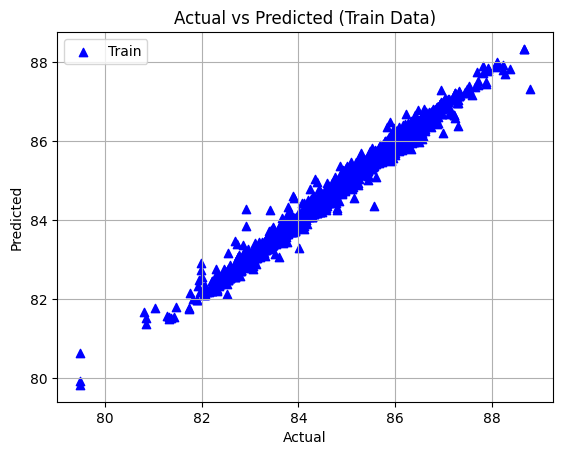

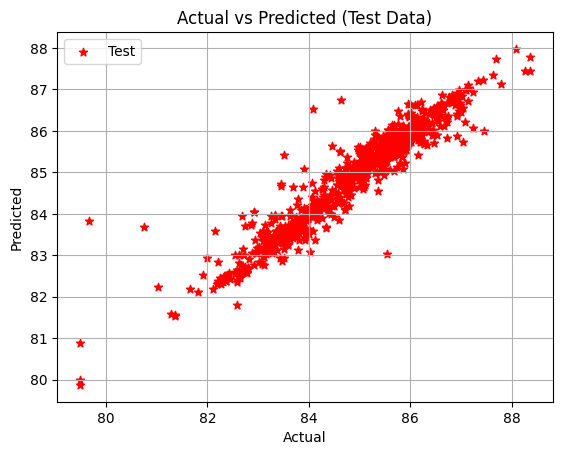

CPU times: total: 4min 39s
Wall time: 4min 40s


In [47]:
%%time
bagging_param_grid = {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 0.8, 1.0]}
eval_metric_bagging_GridSearchBestModel=grid_search_regression_BoostBagg("BaggingRegressor", bagging_param_grid)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7}
Best R-squared score: 0.892


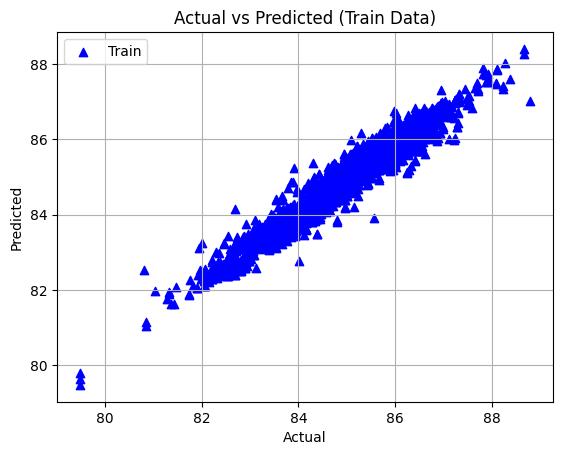

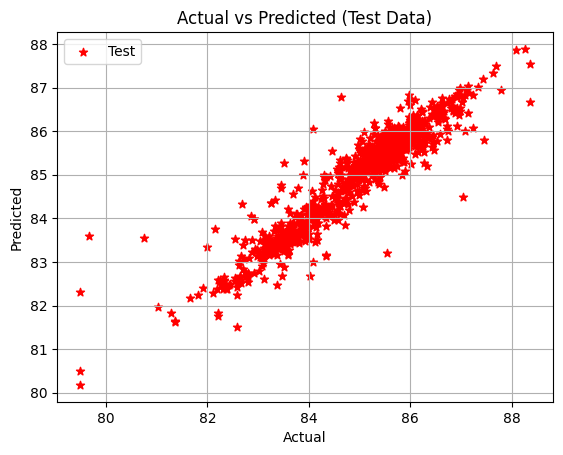

In [48]:
xgb_param_grid = {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7]}
eval_metric_XGB_Bagging_GridSearchBestModel=grid_search_regression_BoostBagg("XGBRegressor", xgb_param_grid)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7}
Best R-squared score: 0.892


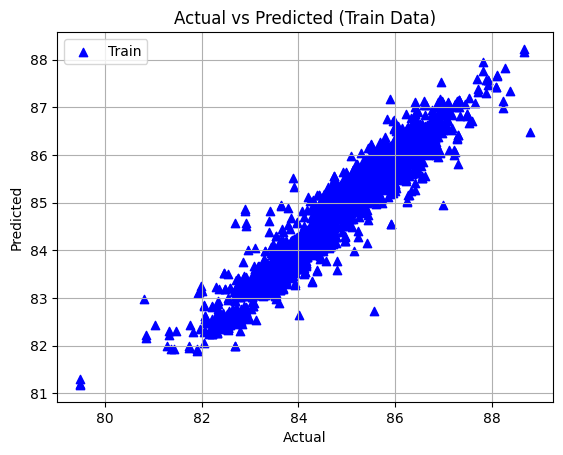

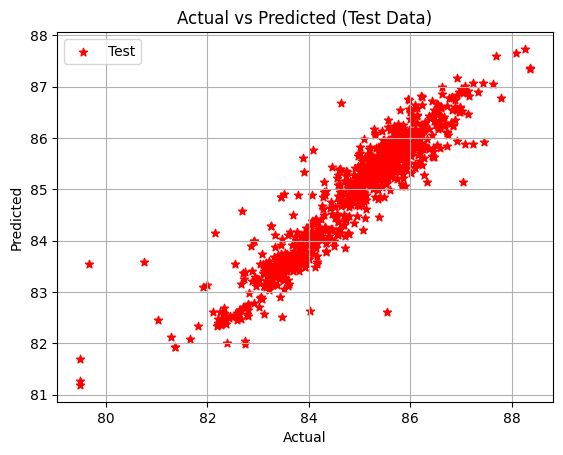

In [49]:
lgbm_param_grid = {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7]}
eval_metric_LGBM_Bagging_GridSearchBestModel=grid_search_regression_BoostBagg("LGBMRegressor", lgbm_param_grid)

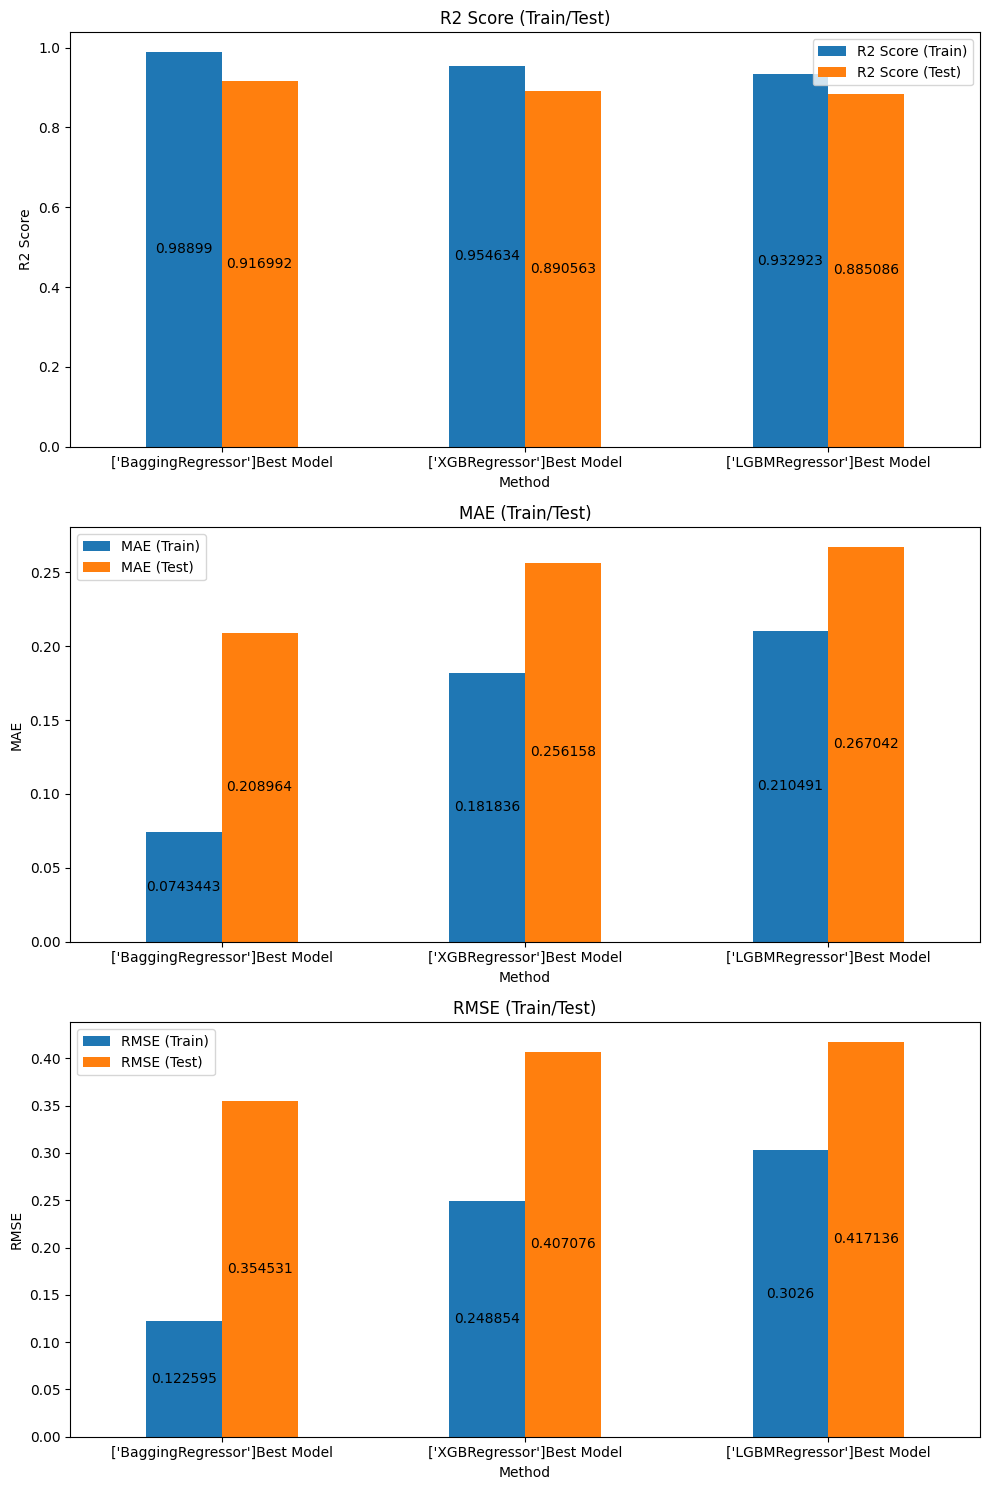

In [50]:
dfs_BaggingBoosting_bestmodel=[eval_metric_bagging_GridSearchBestModel,eval_metric_XGB_Bagging_GridSearchBestModel, 
                     eval_metric_LGBM_Bagging_GridSearchBestModel]
metrics = ['R2 Score', 'MAE', 'RMSE']
eval_metric_BaggingBoosting_bestmodel=bar_plot_evalmetrics(dfs_BaggingBoosting_bestmodel,metrics)

In [51]:
eval_metric_BaggingBoosting_bestmodel

,Method,R2 Score (Train),R2 Score (Test),MAE (Train),MAE (Test),RMSE (Train),RMSE (Test)
0,['BaggingRegressor']Best Model,0.988990,0.916992,0.074344,0.208964,0.122595,0.354531
1,['XGBRegressor']Best Model,0.954634,0.890563,0.181836,0.256158,0.248854,0.407076
2,['LGBMRegressor']Best Model,0.932923,0.885086,0.210491,0.267042,0.302600,0.417136


In [52]:
df_eval=[evaluation_metric_linearRegression,poly_evaluation_metrics_results,
    eval_metric_BaggingBoosting,eval_metric_BaggingBoosting_bestmodel]
metrics = ['R2 Score', 'MAE', 'RMSE']
#final_eval_metrics=bar_plot_evalmetrics(df_eval,metrics)
final_eval_metrics = pd.concat(df_eval, axis=0).reset_index(drop=True)
final_eval_metrics

,Method,MAE (Train),MAE (Test),RMSE (Train),RMSE (Test),R2 Score (Train),R2 Score (Test)
0,Linear Regression,0.387841,0.400294,0.546270,0.541646,0.786750,0.787079
1,Poly_Order_1,0.384836,0.414271,0.531045,0.598392,0.793415,0.763524
2,Poly_Order_2,0.327751,0.354248,0.460104,0.528158,0.844922,0.815778
3,Poly_Order_3,0.264133,0.316611,0.372869,0.585166,0.898153,0.773862
4,Poly_Order_4,0.203799,0.329090,0.284506,0.723696,0.940705,0.654118
5,BAGGINGREGRESSOR,0.085140,0.228129,0.160896,0.405325,0.981036,0.891502
6,XGBREGRESSOR,0.112107,0.233895,0.154627,0.382233,0.982485,0.903512
7,LGBMREGRESSOR,0.194902,0.260513,0.281369,0.408991,0.942005,0.889530
8,['BaggingRegressor']Best Model,0.074344,0.208964,0.122595,0.354531,0.988990,0.916992
9,['XGBRegressor']Best Model,0.181836,0.256158,0.248854,0.407076,0.954634,0.890563


In [53]:
final_eval_metrics.to_csv('Master_Eval_Metric.csv',index=False)

# END